# Лента X Яндекс Практикум - Прогнозирование спроса

**Краткое описание:**

Необходимо создать алгоритм прогноза спроса на 14 дней для товаров собственного производства. Гранулярность ТК-SKU-День.  


**Цель:**

 Сгенерировать различные признаки и
 придумать интерпретируемую, описывающую правильные зависимости (повышение цены вызывает логичное падение спроса), модель прогноза спроса.  Дальше необходимо сделать подневной прогноз спроса на тестовом периоде для каждого товара и магазина, и команда Ленты оценит его качество в сравнении с свершившимся фактом. Метрикой качества будет выступать WAPE, посчитанный на уровне товар, магазин, день. Если есть пропущенные значения и по каким-то товарам не предоставлен прогноз, прогноз считается равным нулю.

Требования к результату:

1. Файл в зафиксированном формате с результатом прогноза спроса (sales_submission.csv).
2. Воспроизводимый код на Python
3. Описание решения:

     a.  Описание модели прогноза спроса, которую вы зафитили
           1. Признаки
           2. интерпретация (shapley values),
           3. кросс-валидация
           4. алгоритмы

     b. Описание вашего алгоритма оптимизации:
          1. методология расчетов
          2. скорость оптимизации

## Задача

 Построить модель прогноза спроса на основе мастер данных и данных продаж с учетом разных признаков.  

## Описание данных

**`sales_df_train.csv` –данные по продажам за скользящий год для обучения**    
       
`st_id` – захэшированное id магазина;  
`pr_sku_id` – захэшированное id товара;  
`date` – дата;  
`pr_sales_type_id` – флаг наличия промо;  
`pr_sales_in_units` – число проданных товаров всего (промо и без);  
`pr_promo_sales_in_units` – число проданных товаров с признаком промо;  
`pr_sales_in_rub` – продажи в РУБ всего (промо и без);  
`pr_promo_sales_in_rub` – продажи с признаком промо в РУБ;  
  
**`pr_df.csv` – данные по товарной иерархии**    
От большего к меньшему `pr_group_id` - `pr_cat_id` - `pr_subcat_id` - `pr_sku_id`.
      
`pr_group_id` – захэшированная группа товара;  
`pr_cat_id` – захэшированная категория товара;  
`pr_subcat_id` – захэшированная подкатегория товара;  
`pr_sku_id` – захэшированное id товара;  
`pr_uom_id` (маркер, обозначающий продаётся товар на вес или в ШТ).  
  
**`pr_st.csv` – данные по магазинам**
      
`st_id` – захэшированное id магазина;  
`st_city_id` – захэшированное id города;  
`st_division_code_id` – захэшированное id дивизиона (изначально назывался `st_division_code`);  
`st_type_format_id` – id формата магазина;  
`st_type_loc_id` – id тип локации/окружения магазина;  
`st_type_size_id` – id типа размера магазина;  
`st_is_active` – флаг активного магазина на данный момент.
   
**`sales_submission.csv` – пример файла с результатом работы модели прогноза спроса**  
Необходимо подготовить файл в таком же формате, заполнив колонку target предсказаниями (по умолчанию колонка заполнена нулями).  
    
`st_id` – захэшированное id магазина;  
`pr_sku_id` – захэшированное id товара;  
`date` – дата (день);  
`target` – спрос в ШТ.

## План работ

*Пишем, что сделано и что думаете сделать.*

**23.09**   
**Даша**  
*Сделано:*   

- Обновлен импорт файлов (можно подтянуть свою директорию)
- Парсинг дат сразу при импорте файлов
- Изменила название столбца `st_division_code` на `st_division_code_id` для единообразия с ТЗ
- EDA для df_sales при помощи pandas profiling. Выводы написаны после профайла - для предобработки.

*Сделать:*  
- Импорт файлов: можно подтягивать файлы из общего облака. И на будушее надо подумать, как мы будем тянуть файлы из БД (вопрос был от бэка: названия всех столбцов должны судя по всему совпадать для синхронизации с бэком)

**24.09**  
**Даша**  
*Сделано:*  
  
- phik корреляция для всех основных df (корреляция по столбцам).  
- Анализ временных рядов. Видны зависимости по месяцам + внутри недели.  

  
*Сделать:*  
- Для phik не писала выводы + нужно решить, что делать с сильно коррелирующими столбцами.  
- Учесть сезоннность в 1) лаговых фичах 2) простых фичах типа "день", "число", "месяц" (см. что писала в телеграме)  
- Можно (нужно?) еще поковыряться в сезонности/трендах/шумах. Ресемплировать по-другому (по неделям кстати не получилось, говорит, мало данных). Правильно ли, что для анализа я агрегирую `df_full_sales` по date? Нужно подумать над агрегирующими функциями и какие столбцы анализировать. Я проводила анализ по сумме `pr_sales_in_units`. Есть ли смысл проводить анализ временного ряда по `pr_sales_in_rub` (корреляция 0.61)?  Наверное интересно посмотреть сезонность/тренды, например, по количеству тех или иных категорий продуктов. Либо по весовым/штучным товарам.
- Осилить prophet - сделать его как фичи для бустинга  
- Почистить дубликаты  
- Есть ли пропуски в финальном df? Я не проверяла. Если есть, нужно обработать.
  
**25.09**  
**Даша**
  
*Сделано*:
- Добавила SHAP.
- Проверила СВ без Prophet: rolling=30, max_lag=30, iterations=500 (лень было ждать, поставлю сейчас 1000 на ночь), depth=10. wape=0.306.
- При rolling=14, max_lag=14, iterations=1000 wape = 0.256, самые важные фичи: rolling_mean (может наоборот сделать его еще меньше, =7?), risk_factor_no_promo, clusters, rolling_std, pr_sku_id, pr_subcat_id, pr_uom_id, затем все лаги.  
  
**26.09**  
**Даша**
  
*Сделано*:
- CV (train/test)
- CatBoost на кросс-валидации с неудачным тюнингом гиперпараметров (выбирались от балды)  
  
*Сделать*:
- Добавить СV в pipeline
- Linear Regression
- Еще раз посмотреть на фичи. Добавить максимальное/минимальное значение серии в окне, cреднее/медианное значение в окне, отклонение окна  
- Почитать подробнее https://www.kaggle.com/code/kashnitsky/topic-9-part-1-time-series-analysis-in-python. Holt-Winters выглядит чем-то полезным, пока не понимаю, можно ли это использовать и для чего.  
  
**27.09**  
**Даша**
  
*Сделано*:
  
В pipeline (раздел Pipeline ver. 2):    
- Удалила столбец с признаком активности магазина, добавила новые признаки:
  * Максимальное/минимальное значение pr_sales_in_units серии в окне  
  * Среднее/медианное значение   pr_sales_in_units в окне   
  * Отклонение окна pr_sales_in_units  
- Закомментировала признаки month, day, year, т.к. у нас нет сезонности по ним, могут ухудшать метрику.
- Попыталась объединить два пайплайна в один (добавила cv и тюнинг гиперпараметров), но где-то теряется столбец 'pr_sales_in_rub', код падает.

**25.09**   
**Влад**


*Сделано:*
* Добавил коэф риска по каждому магазину
* Сделал knn, пожоже придется 5 моделей строить для каждой группы, также по размеру 5 зашифрованных параметров, кластеры и зашифрованые размеры не всегда совподают
* разбераюсь с профет, и смотрю алгоримы для подбора гипперпарметров  один из них https://dzen.ru/a/Yp7abcmh139Y_znw
* профет так мне не покарился подумаю позже на свежую голову

__25.09__
__Паша__

- Сделал профет
- Посчитал все корреляции, жду ответа, как их применить грамотно
- Затюнул тестовую модель catboost`а
- Поменял пару функций для FE

- Сорри, что первый раз сюда отписал

## Импорт библиотек

In [1]:
!pip install pandas-profiling
!pip install catboost
!pip install optuna
!pip install shap
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 57.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=35c9dd6d178df5bca8f9cee192c8c124a6ce0f85aa97399eb681848c253e55b3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
os.environ['PYTHONWARNINGS'] = 'ignore'

from catboost import CatBoostRegressor

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
from matplotlib import colors

import numpy as np

import optuna

import pandas as pd
from pandas_profiling import ProfileReport
import phik
from phik import report
from phik.report import plot_correlation_matrix
from prophet import Prophet

from scipy import stats
from scipy.stats import norm, poisson
import seaborn as sns
import shap
from sklearn.base import (BaseEstimator,
                          TransformerMixin,
                          RegressorMixin)
from sklearn.cluster import (KMeans,
                             AgglomerativeClustering)
from sklearn.linear_model import Lasso
from sklearn.metrics import silhouette_score
from sklearn.model_selection import (train_test_split,
                                     TimeSeriesSplit,
                                     RandomizedSearchCV)

from sklearn.pipeline import (Pipeline,
                              FeatureUnion)
from sklearn.preprocessing import (FunctionTransformer,
                                   StandardScaler,
                                   MinMaxScaler)
from statsmodels.tsa.seasonal import seasonal_decompose

import time
from tslearn.clustering import TimeSeriesKMeans
from tqdm.autonotebook import tqdm
import joblib
from datetime import timedelta

Mounted at /content/drive


<ipython-input-2-345545651a06>:17: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Функции

Напишем функции для использования в данном коде:

In [3]:
def wape(y_true: np.array, y_pred: np.array):
    """
    Функция вычисляет метрику WAPE (Weighted Absolute Percent Error) -
    взвешенную абсолютную ошибку прогнозирования.

    Параметры:
    - y_true: реальные значения таргетов
    - y_pred: предсказанные значения таргетов

    Возвращаемое значение:
    - метрика WAPE
    """
    return np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true))

def distribution(df):
    """
    Функция строит график распределения данных

    Параметры:
    - df: датафрейм

    Возвращаемое значение:
    - distplot, probplot
    """
    sns.distplot(df[df != 0], fit=norm);
    fig = plt.figure()
    res = stats.probplot(df[df != 0], plot=plt)

In [4]:
def plot_phik_overview(dataframe):
    """
    Функция для построения тепловой карты phik-корреляции

    Параметры:
    - dataframe: датафрейм
    """
    phik_overview = dataframe.phik_matrix()

    # Устанавливаем диапазон значений цветовой карты
    cmap = plt.cm.get_cmap('Purples', 11) # Градиент от 0 до 1 с 11 различными цветами

    figure, axes = plt.subplots(figsize=(8, 8))
    axes.imshow(phik_overview, cmap=cmap, aspect='auto')

    axes.set_xticks(np.arange(len(phik_overview.columns)))
    axes.set_xticklabels(phik_overview.columns, rotation=90, fontsize=10)

    axes.set_yticks(np.arange(len(phik_overview.columns)))
    axes.set_yticklabels(phik_overview.columns, fontsize=10)

    # Добавляем значения в ячейки
    for i in range(len(phik_overview.columns)):
        for j in range(len(phik_overview.columns)):
            text = axes.text(j, i, round(phik_overview.iloc[i, j], 2),
                             ha='center', va='center', color='black')

    # Добавляем цветовую шкалу
    plt.colorbar(axes.imshow(phik_overview, cmap=cmap, aspect='auto'),
                 ticks=np.arange(0, 1.1, 0.1))

    plt.title(r'correlation $\phi_K$', fontsize=12)
    plt.tight_layout()
    plt.show()

In [5]:
def round_columns_to_int(df, columns):
    """
    Округляет все значения в выбранных столбцах до целых чисел.

    - df: pd.DataFrame - исходный датафрейм, в котором нужно округлить значения столбцов.
    - columns: List[str] - список названий столбцов, значения в которых нужно округлить до целых чисел.

    """
    df[columns] = df[columns].round().astype(int)
    return df

In [6]:
def wape_scorer(estimator, X, y):
    """
    Функция вычисляет отрицательную метрику WAPE (Weighted Absolute Percent Error) -
    взвешенную абсолютную ошибку прогнозирования, для использовании в
    RandomizedSearchCV (минимизации метрики WAPE)
    """
    y_pred = estimator.predict(X)
    return -wape(y, y_pred)

## Константы

In [7]:
random_state = np.random.RandomState(42)

## EDA и графики временных рядов

### Импорт файлов

Импорт при помощи библиотеки os, чтобы мы могли при необходимости открывать файлы из разных путей. Сразу спарсим даты:

In [8]:
pth1 = '/content/drive/MyDrive/sp_sales_task/'
pth2 = 'другой путь'

files = ['sales_df_train.csv',
         'pr_df.csv',
         'st_df.csv',
         'sales_submission.csv',
         'holidays_covid_calendar.csv']

names = ['df_sales',
         'df_pr',
         'df_pr_st',
         'df_sales_sub',
         'holidays_df']

for name, file in zip(names, files):
    df_name = name
    if os.path.exists(pth1 + file):
        df = pd.read_csv(pth1 + file)
    elif os.path.exists(pth2 + file):
        df = pd.read_csv(pth2 + file)
    else:
        print('Something is wrong')
        continue

    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])

    globals()[df_name] = df

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


### df_sales

Посмотрим, как выглядят исходные файлы:

In [ ]:
df_sales.sort_values(by='date').tail(2)

st_id                         pr_sku_id  \
672233  6364d3f0f495b6ab9dcf8d3b5c6e0b01  22b3872c9768b6070e1111d85e8e9660   
779153  c81e728d9d4c2f636f067f89cc14862c  a7a9eb3ffb9634e37c50995c34da34d0   

             date  pr_sales_type_id  pr_sales_in_units  \
672233 2023-07-18                 0                0.0   
779153 2023-07-18                 0                5.0   

        pr_promo_sales_in_units  pr_sales_in_rub  pr_promo_sales_in_rub  
672233                      0.0            106.0                    0.0  
779153                      0.0            250.0                    0.0

In [ ]:
df_sales.dtypes

st_id                              object
pr_sku_id                          object
date                       datetime64[ns]
pr_sales_type_id                    int64
pr_sales_in_units                 float64
pr_promo_sales_in_units           float64
pr_sales_in_rub                   float64
pr_promo_sales_in_rub             float64
dtype: object

Строки с id товара `29d828d283d16edcaa8c712375fc5e2a`, смотрим на строки с промо: есть строки, где продажи в штуках = 0, а продажи в рублях не нулевые.

In [ ]:
df_sales.sort_values(by='date')[df_sales['pr_sku_id'] == '29d828d283d16edcaa8c712375fc5e2a'].head(3)

Boolean Series key will be reindexed to match DataFrame index.


st_id                         pr_sku_id  \
576366  c81e728d9d4c2f636f067f89cc14862c  29d828d283d16edcaa8c712375fc5e2a   
268831  c81e728d9d4c2f636f067f89cc14862c  29d828d283d16edcaa8c712375fc5e2a   
164140  c81e728d9d4c2f636f067f89cc14862c  29d828d283d16edcaa8c712375fc5e2a   

             date  pr_sales_type_id  pr_sales_in_units  \
576366 2022-08-01                 1                0.0   
268831 2022-08-01                 0                1.0   
164140 2022-08-02                 0                4.0   

        pr_promo_sales_in_units  pr_sales_in_rub  pr_promo_sales_in_rub  
576366                      0.0            152.0                  152.0  
268831                      0.0            325.0                    0.0  
164140                      0.0           1405.0                    0.0

Общая информация о датафрейме:

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   st_id                    883015 non-null  object        
 1   pr_sku_id                883015 non-null  object        
 2   date                     883015 non-null  datetime64[ns]
 3   pr_sales_type_id         883015 non-null  int64         
 4   pr_sales_in_units        883015 non-null  float64       
 5   pr_promo_sales_in_units  883015 non-null  float64       
 6   pr_sales_in_rub          883015 non-null  float64       
 7   pr_promo_sales_in_rub    883015 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 53.9+ MB


Пропусков нет.

In [ ]:
(df_sales['pr_sales_in_rub'] < 0).sum()

78

Посмотрим на статистики:

In [ ]:
df_sales.describe()

pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
count     883015.000000      883015.000000            883015.000000   
mean           0.406486           5.037956                 2.230010   
std            0.491178          13.402984                11.063288   
min            0.000000         -39.000000               -39.000000   
25%            0.000000           1.000000                 0.000000   
50%            0.000000           2.000000                 0.000000   
75%            1.000000           4.000000                 1.000000   
max            1.000000        2348.000000              2348.000000   

       pr_sales_in_rub  pr_promo_sales_in_rub  
count    883015.000000          883015.000000  
mean        596.705181             294.766561  
std        1577.366179            1402.764168  
min       -3373.000000           -3373.000000  
25%          98.000000               0.000000  
50%         224.000000               0.000000  
75%         540.000000             127.000000  
max      183265.000000          183265.000000

Для наглядности построим профайл для датафрейма df_sales, пока мы его не предобработали:

In [ ]:
profile = ProfileReport(df_sales, progress_bar=False)
profile

**Выводы:**    
  
8 столбцов  
883к наблюдений  
0 пропусков  
0 дубликатов  
3 категориальных столба, 4 числовых, 1 даты  
  
Значение коэффициента асимметрии (γ1 = 31.57841829) указывает на то, что столбец `pr_sales_in_units` имеет выраженную правостороннюю асимметрию. Это означает, что большинство значений в столбце распределены ближе к нулю, а имеющиеся значения, которые отклоняются от нуля, встречаются реже и существенно влияют на анализ данных.  
Аналогичная ситуация `pr_promo_sales_in_units` и `pr_promo_sales_in_rub`.  
  
*Значение коэффициента асимметрии γ1 больше 0 указывает на правостороннюю асимметрию (большинство значений смещено влево от среднего значения), в то время как значение меньше 0 указывает на левостороннюю асимметрию (большинство значений смещено вправо от среднего значения).*    
  
`st_id` - 12 уникальных значений, т.е. у нас есть данные по 12 магазинам.   
Есть магазины, по которым данным 0.3%, 0.1% и меньше.  
  
`pr_sku_id` - 1991 уникальное значение (1991 позиций товаров).   
  
`date` - нам предоставлены данные за 352 дня с 08.08.2022 23:06:40 по 22.07.2023 04:26:40. 08.08.2022 получается данные даны меньше чем за час, 22.07.2023 только за четыре часа.   
  
`pr_sales_type_id` категориальный столбец, содержит значения 0 и 1 (флаг наличия промо). 59.4% продаж без промо, 40.6% продаж с промо.   
  
`pr_sales_in_units` - число проданных товаров всего. 71 отрицательных значений (<0.1%) - такие строки удалим, т.к. это были возвраты - в прогнозировании спроса мы возвраты не учитываем. 7.5% нулевых значений. Максимальное количество - 2348 (95-ый перцентиль = 18). Выбросы: посмотреть box-and-whiskers plot. После того как избавимся от выбросов еще раз посмотреть гистограмму распределения.  
  
`pr_promo_sales_in_units` - число проданных товаров по промо. Аналогично: 35 отрицательных значений (<0.1%), максимум 2348 (95-ый перцентиль = 10). Проверить и избавиться от выбросов. После того как избавимся от выбросов еще раз посмотреть гистограмму распределения.  
  
`pr_sales_in_rub` - продажи всего в рублях. 78 отрицательных значений - возвраты - удаляем.  Выбросы - проверяем и избавляемся.  
  
`pr_promo_sales_in_rub` - продажи промо в рублях. 36 отрицательных значений - возвраты - удаляем.  Выбросы - проверяем и избавляемся.  


Количество уникальных SKU:

In [ ]:
df_sales['pr_sku_id'].unique().shape

(1991,)

Проверим Phik корреляцию, у которой нет таких строгих предположений о том, что переменные распределены нормально и однородны. Она способна улавливать нелинейные взаимосвязи, которые будут моделироваться в линейной регрессии немного иначе в зависимости от характера взаимосвязи (то есть ели phik обнаруживает какую-то более сильную взаимосвязь, чем линейный corr, значит есть смысл изучить характер взаимосвязи подробнее и постараться его учесть при моделировании).

interval columns not set, guessing: ['pr_sales_type_id', 'pr_sales_in_units', 'pr_promo_sales_in_units', 'pr_sales_in_rub', 'pr_promo_sales_in_rub']


The number of unique values of variable pr_sku_id is large: 1991. Are you sure this is not an interval variable? Analysis for pairs of variables including pr_sku_id can be slow.
The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


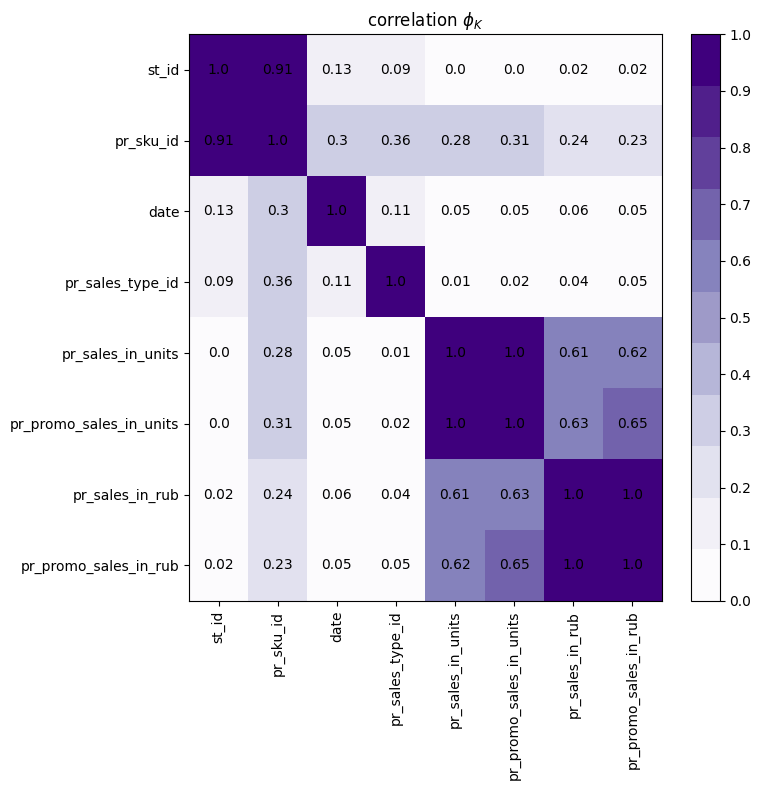

In [ ]:
plot_phik_overview(df_sales);

### df_pr

Общая информация о датафрейме:

In [ ]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pr_sku_id     2050 non-null   object
 1   pr_group_id   2050 non-null   object
 2   pr_cat_id     2050 non-null   object
 3   pr_subcat_id  2050 non-null   object
 4   pr_uom_id     2050 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.2+ KB


Посмотрим ветвление (группы-категории-подкатегории-товары):

In [ ]:
sub_in_cat = (df_pr.groupby('pr_cat_id')[['pr_subcat_id']]
              .count()
              .sort_values(
                  by='pr_subcat_id',ascending=False)
              )
sub_in_cat['pr_cat_id'] = sub_in_cat.index
print('Количество групп:', df_pr['pr_group_id'].unique().shape[0])
print('Количество категорий товаров:',sub_in_cat['pr_cat_id'].count())
print('Количество субкатегорий товаров:',df_pr['pr_subcat_id'].unique().shape[0])
print('Количество товаров:',df_pr['pr_sku_id'].unique().shape[0])

Количество групп: 9
Количество категорий товаров: 43
Количество субкатегорий товаров: 170
Количество товаров: 2050


In [ ]:
df_pr.head(2)

pr_sku_id                       pr_group_id  \
0  fd064933250b0bfe4f926b867b0a5ec8  c74d97b01eae257e44aa9d5bade97baf   
1  71c9661741caf40a92a32d1cc8206c04  c74d97b01eae257e44aa9d5bade97baf   

                          pr_cat_id                      pr_subcat_id  \
0  1bc0249a6412ef49b07fe6f62e6dc8de  ca34f669ae367c87f0e75dcae0f61ee5   
1  c559da2ba967eb820766939a658022c8  e06f5ed77191826c212c30722f2cc5a2   

   pr_uom_id  
0         17  
1         17

Проверим пропуски в столбцах:

In [ ]:
df_pr.isna().sum()

pr_sku_id       0
pr_group_id     0
pr_cat_id       0
pr_subcat_id    0
pr_uom_id       0
dtype: int64

Проверим типы данных в столбцах:

In [ ]:
df_pr.dtypes

pr_sku_id       object
pr_group_id     object
pr_cat_id       object
pr_subcat_id    object
pr_uom_id        int64
dtype: object

Посмотрим, как пересекаются id товаров в df_sales и df_pr:

In [ ]:
print(len(df_sales['pr_sku_id'].unique()))
print((df_pr['pr_sku_id'].unique()).shape)

len(list(set(df_sales['pr_sku_id']) & set(df_pr['pr_sku_id'])))

1991
(2050,)


1991

Построим профайл по df_pr:

In [ ]:
profile = ProfileReport(df_pr, progress_bar=False)
profile

Вывод по датафрейму:
* Пропусков нет
* Количество групп: 9
* Количество категорий товаров: 43
* Количество субкатегорий товаров: 170
* Количество товаров: 2050  
* Была аномалия в  маркере за штуку `pr_uom_id`. Отношения вес/штука, если принять, что весовые позиции  =  1, то 60\40  
* 2 полных дубликата строк (0.1%) - удалить  
* `pr_uom_id` - категориальный столбец, значения 1 и 0   


Проверим Phik корреляцию, у которой нет таких строгих предположений о том, что переменные распределены нормально и однородны. Она способна улавливать нелинейные взаимосвязи, которые будут моделироваться в линейной регрессии немного иначе в зависимости от характера взаимосвязи (то есть ели phik обнаруживает какую-то более сильную взаимосвязь, чем линейный corr, значит есть смысл изучить характер взаимосвязи подробнее и постараться его учесть при моделировании).

interval columns not set, guessing: ['pr_uom_id']


The number of unique values of variable pr_sku_id is large: 2050. Are you sure this is not an interval variable? Analysis for pairs of variables including pr_sku_id can be slow.
The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


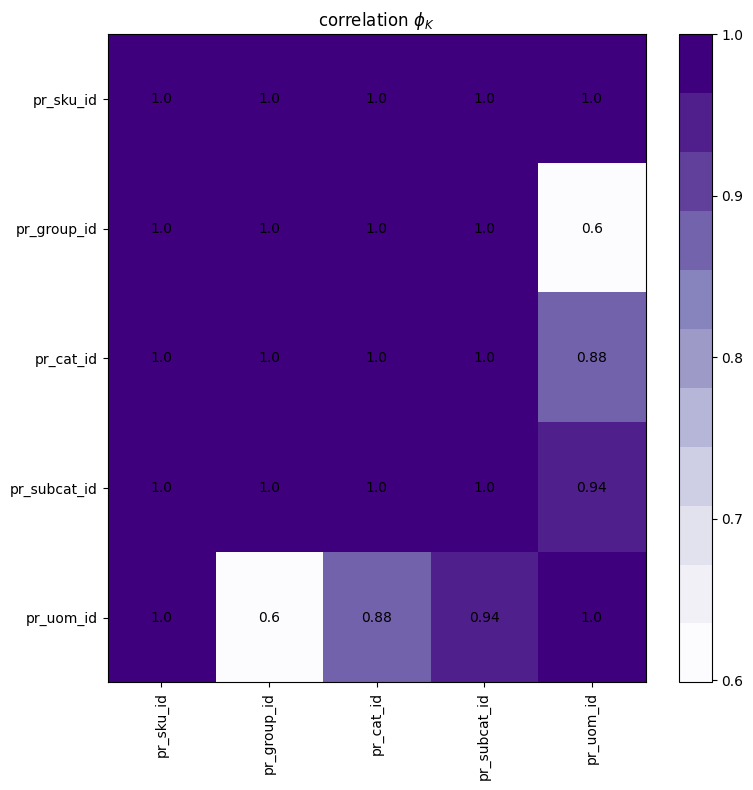

In [ ]:
plot_phik_overview(df_pr);

### df_pr_st

Посмотрим, как выглядит датафрейм:

In [ ]:
df_pr_st.head(3)

st_id                        st_city_id  \
0  1aa057313c28fa4a40c5bc084b11d276  1587965fb4d4b5afe8428a4a024feb0d   
1  bd470ca955d9497bbcb808e59952fffc  955d864a62659945cc9434898e275deb   
2  6364d3f0f495b6ab9dcf8d3b5c6e0b01  b8b4b727d6f5d1b61fff7be687f7970f   

                   st_division_code  st_type_format_id  st_type_loc_id  \
0  81b4dd343f5880df806d4c5d4a846c64                  4               3   
1  e26072c92d8fe0738df44d571d5f5e8b                  4               3   
2  da742b3cfca5388aaf9af28a726a3c30                  1               1   

   st_type_size_id  st_is_active  
0               19             0  
1               19             1  
2               12             1

In [ ]:
print('Количество  магазинов:',df_pr_st['st_id'].unique().shape[0])
print('Количество  городов:',df_pr_st['st_city_id'].unique().shape[0])

Количество  магазинов: 12
Количество  городов: 7


Типы данных в столбцах:

In [ ]:
df_pr_st.dtypes

st_id                object
st_city_id           object
st_division_code     object
st_type_format_id     int64
st_type_loc_id        int64
st_type_size_id       int64
st_is_active          int64
dtype: object

Общая информация о датафрейме:

In [ ]:
df_pr_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   st_id              12 non-null     object
 1   st_city_id         12 non-null     object
 2   st_division_code   12 non-null     object
 3   st_type_format_id  12 non-null     int64 
 4   st_type_loc_id     12 non-null     int64 
 5   st_type_size_id    12 non-null     int64 
 6   st_is_active       12 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 800.0+ bytes


Проверим Phik корреляцию, у которой нет таких строгих предположений о том, что переменные распределены нормально и однородны. Она способна улавливать нелинейные взаимосвязи, которые будут моделироваться в линейной регрессии немного иначе в зависимости от характера взаимосвязи (то есть ели phik обнаруживает какую-то более сильную взаимосвязь, чем линейный corr, значит есть смысл изучить характер взаимосвязи подробнее и постараться его учесть при моделировании).

interval columns not set, guessing: ['st_type_format_id', 'st_type_loc_id', 'st_type_size_id', 'st_is_active']


The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


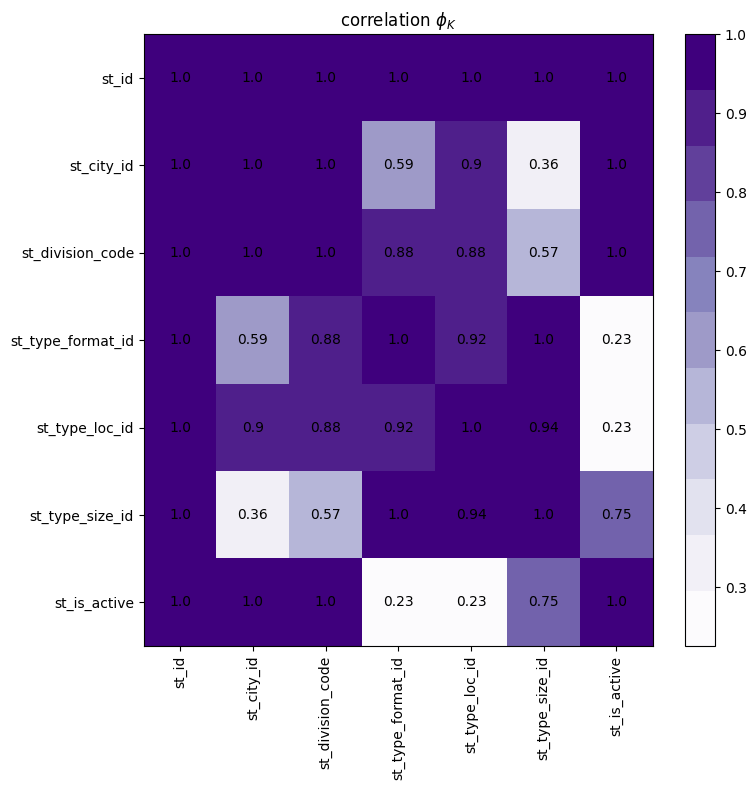

In [ ]:
plot_phik_overview(df_pr_st);

### df_sales_sub

In [ ]:
df_sales_sub.head()

st_id                         pr_sku_id  \
0  16a5cdae362b8d27a1d8f8c7b78b4330  0045ebdb1069ff4b3dd3efe628c39cd3   
1  16a5cdae362b8d27a1d8f8c7b78b4330  00661699f543753ec7e911a64b9fd2f6   
2  16a5cdae362b8d27a1d8f8c7b78b4330  0094042bfeae507dc7f62acc8e5ed03a   
3  16a5cdae362b8d27a1d8f8c7b78b4330  0169529ff660adcac9b7e354e0c4b882   
4  16a5cdae362b8d27a1d8f8c7b78b4330  01e4734745e97e52d3213449e1a05dd7   

        date  target  
0 2023-07-20       0  
1 2023-07-20       0  
2 2023-07-20       0  
3 2023-07-20       0  
4 2023-07-20       0

Уникальные значения st_id в df_sales_sub:

In [ ]:
df_sales_sub['st_id'].unique()

array(['16a5cdae362b8d27a1d8f8c7b78b4330',
       '1ecfb463472ec9115b10c292ef8bc986',
       '42a0e188f5033bc65bf8d78622277c4e',
       '53e19f3dbb211f20b20b45668303c1b6',
       '6364d3f0f495b6ab9dcf8d3b5c6e0b01',
       'c81e728d9d4c2f636f067f89cc14862c',
       'f7e6c85504ce6e82442c770f7c8606f0',
       'fa7cdfad1a5aaf8370ebeda47a1ff1c3'], dtype=object)

Типы данных в столбцах:

In [ ]:
df_sales_sub.dtypes

st_id                object
pr_sku_id            object
date         datetime64[ns]
target                int64
dtype: object

In [ ]:
print('Число уникальных магазинов -', len(df_sales['st_id'].unique()))

Число уникальных магазинов - 12


### df_full_sales (sales + pr + pr_st)

Объединим датафреймы `df_sales` и `df_pr` по `pr_sku_id`, а затем объединенный датафрейм с `df_pr_st` по `st_id`. Получим итоговый датафрейм `df_full_sales`, который будем использовать в дальнейшем для работы и аналитики.

In [ ]:
df_sales_combine = pd.merge(df_sales, df_pr, on='pr_sku_id')
df_sales_combine.shape

In [ ]:
df_full_sales = pd.merge(df_sales_combine, df_pr_st, on='st_id')
df_full_sales.head(3)

In [ ]:
df_full_price['pr_sales_in_units'].hist(bins=30)

In [ ]:
df_full_sales.st_type_size_id.unique()

array([ 8, 12, 28, 19, 20, 32])

Посмотрим боксплот, избавимся от выбросов (где количество продаж в штуках меньше 70):

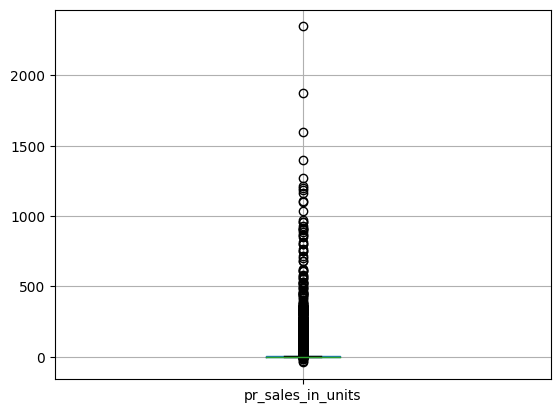

In [ ]:
df_full_sales.boxplot(['pr_sales_in_units'])
df_full_sales = df_full_sales.loc[df_full_sales['pr_sales_in_units'] < 60]

Количество неактивных магазинов:

In [ ]:
(df_full_sales['st_is_active'] == 0).sum()

729

Без первичной предобработки не получается нормальный анализ временных рядов, данные не возрастают монотонно и выбросы будут мешать в графиках временных рядов. Поэтому сохраняем начальную предобработку, потом перезапишем `df_full_sales` перед использованием пайплайна.

In [ ]:
df_full_sales = df_full_sales.loc[df_full_sales['st_is_active'] == 1]
df_full_sales = df_full_sales.loc[
    (df_full_sales['st_id'] != 'bd470ca955d9497bbcb808e59952fffc') &
    (df_full_sales['st_id'] != '084a8a9aa8cced9175bd07bc44998e75')]

In [ ]:
df_full_sales = df_full_sales.sort_values(by='date', ignore_index = True)

df_full_sales['price'] = np.where(
    df_full_sales['pr_sales_in_units'] > 0,
    df_full_sales['pr_sales_in_rub'] / df_full_sales['pr_sales_in_units'],
    0)
df_full_sales['promo_price'] = np.where(
    df_full_sales['pr_promo_sales_in_units'] > 0,
    df_full_sales['pr_promo_sales_in_rub'] / df_full_sales['pr_promo_sales_in_units'],
    0)
df_full_sales.head(3)

st_id                         pr_sku_id  \
0  c81e728d9d4c2f636f067f89cc14862c  3424471c964d8894456743e62f7ef938   
1  fa7cdfad1a5aaf8370ebeda47a1ff1c3  67797f1f0f02ec5ccd5e3abd2d4e5b81   
2  16a5cdae362b8d27a1d8f8c7b78b4330  6ce20ee0cd25f2265f9c839747f3f60a   

        date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0 2022-08-01                 1                1.0                      1.0   
1 2022-08-01                 1                1.0                      1.0   
2 2022-08-01                 1                5.0                      5.0   

   pr_sales_in_rub  pr_promo_sales_in_rub                       pr_group_id  \
0            141.0                  141.0  1ff1de774005f8da13f42943881c655f   
1             71.0                   71.0  aab3238922bcc25a6f606eb525ffdc56   
2            243.0                  243.0  c74d97b01eae257e44aa9d5bade97baf   

                          pr_cat_id                      pr_subcat_id  \
0  a6ea8471c120fe8cc35a2954c9b9c595  7a5364146ce749c6475744d659d14df2   
1  28fc2782ea7ef51c1104ccf7b9bea13d  b3e70d072fc648f6934c288e44f5c35e   
2  c559da2ba967eb820766939a658022c8  8ec316a6bd7240d74c0567a1d9b311e5   

   pr_uom_id                        st_city_id  \
0          1  908c9a564a86426585b29f5335b619bc   
1          1  885fe656777008c335ac96072a45be15   
2         17  c1f75cc0f7fe269dd0fd9bd5e24f9586   

                   st_division_code  st_type_format_id  st_type_loc_id  \
0  429a86ff6336c144ddaf6144f52ab52c                  1               1   
1  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2  296bd0cc6e735f9d7488ebc8fbc19130                  1               2   

   st_type_size_id  st_is_active  price  promo_price  
0                8             1  141.0        141.0  
1               12             1   71.0         71.0  
2                8             1   48.6         48.6

Проверяем пропуски:

In [ ]:
df_full_sales.isna().sum()

st_id                      0
pr_sku_id                  0
date                       0
pr_sales_type_id           0
pr_sales_in_units          0
pr_promo_sales_in_units    0
pr_sales_in_rub            0
pr_promo_sales_in_rub      0
pr_group_id                0
pr_cat_id                  0
pr_subcat_id               0
pr_uom_id                  0
st_city_id                 0
st_division_code           0
st_type_format_id          0
st_type_loc_id             0
st_type_size_id            0
st_is_active               0
price                      0
promo_price                0
dtype: int64

Общая информация о получившемся датафрейме:

In [ ]:
df_full_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874546 entries, 0 to 874545
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   st_id                    874546 non-null  object        
 1   pr_sku_id                874546 non-null  object        
 2   date                     874546 non-null  datetime64[ns]
 3   pr_sales_type_id         874546 non-null  int64         
 4   pr_sales_in_units        874546 non-null  float64       
 5   pr_promo_sales_in_units  874546 non-null  float64       
 6   pr_sales_in_rub          874546 non-null  float64       
 7   pr_promo_sales_in_rub    874546 non-null  float64       
 8   pr_group_id              874546 non-null  object        
 9   pr_cat_id                874546 non-null  object        
 10  pr_subcat_id             874546 non-null  object        
 11  pr_uom_id                874546 non-null  int64         
 12  st_city_id      

Проверим Phik корреляцию, у которой нет таких строгих предположений о том, что переменные распределены нормально и однородны. Она способна улавливать нелинейные взаимосвязи, которые будут моделироваться в линейной регрессии немного иначе в зависимости от характера взаимосвязи (то есть ели phik обнаруживает какую-то более сильную взаимосвязь, чем линейный corr, значит есть смысл изучить характер взаимосвязи подробнее и постараться его учесть при моделировании).

interval columns not set, guessing: ['pr_sales_type_id', 'pr_sales_in_units', 'pr_promo_sales_in_units', 'pr_sales_in_rub', 'pr_promo_sales_in_rub', 'pr_uom_id', 'st_type_format_id', 'st_type_loc_id', 'st_type_size_id', 'st_is_active', 'price', 'promo_price']


The number of unique values of variable pr_sku_id is large: 1971. Are you sure this is not an interval variable? Analysis for pairs of variables including pr_sku_id can be slow.
Not enough unique value for variable st_is_active for analysis 1. Dropping this column
The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


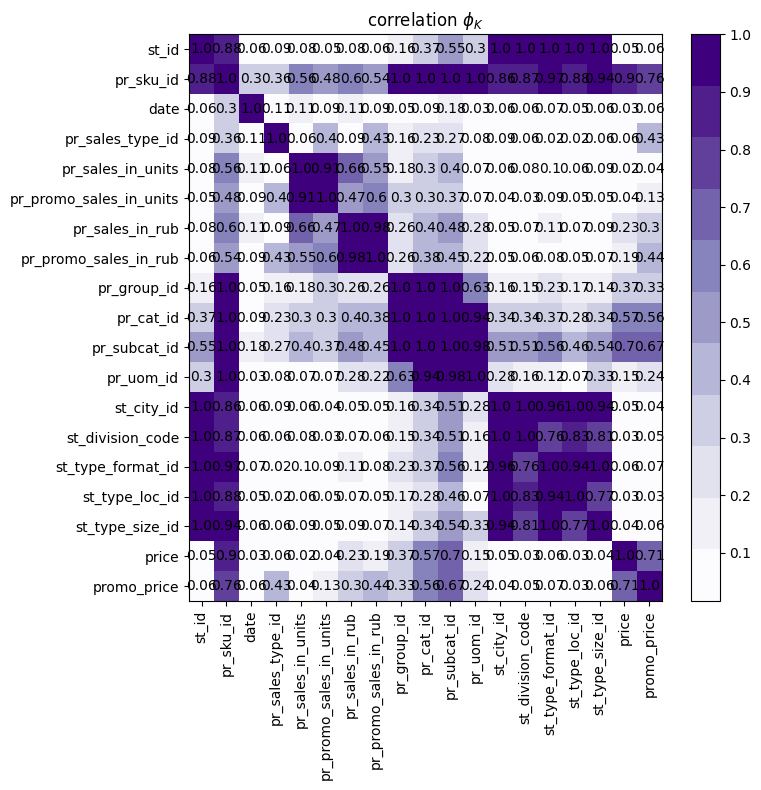

In [ ]:
plot_phik_overview(df_full_sales);

### Анализ временных рядов

Проанализируем сезонность, тренды и шумы в итоговом датафрейме `df_full_sales`, чтобы затем иметь представление о том, какие фичи будут необходимы/важны для модели (например, будет сезонность по неделям - сделаем фичу "день недели" и т.д.)  
  
Вспомним, как выглядит датафрейм:

In [ ]:
df_full_sales.head(3)

st_id                         pr_sku_id  \
0  c81e728d9d4c2f636f067f89cc14862c  0796ad00c36e07e171aeea8b65057fa3   
1  6364d3f0f495b6ab9dcf8d3b5c6e0b01  ca508b71f8e81b9ba5c419e9b31cc2ef   
2  1ecfb463472ec9115b10c292ef8bc986  3d3e83a9b78957e45c94dd862eb0bc43   

        date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0 2022-08-01                 0                1.0                      0.0   
1 2022-08-01                 0                2.0                      0.0   
2 2022-08-01                 0                2.0                      0.0   

   pr_sales_in_rub  pr_promo_sales_in_rub                       pr_group_id  \
0            137.0                    0.0  aab3238922bcc25a6f606eb525ffdc56   
1            477.0                    0.0  6512bd43d9caa6e02c990b0a82652dca   
2             57.0                    0.0  c74d97b01eae257e44aa9d5bade97baf   

                          pr_cat_id                      pr_subcat_id  \
0  9701a1c165dd9420816bfec5edd6c2b1  c01c475ac8d447730ece97d846cc4f25   
1  c9f95a0a5af052bffce5c89917335f67  507c9dcd6538b05090d22c4b73c535a7   
2  c559da2ba967eb820766939a658022c8  8ec316a6bd7240d74c0567a1d9b311e5   

   pr_uom_id                        st_city_id  \
0          1  908c9a564a86426585b29f5335b619bc   
1          1  b8b4b727d6f5d1b61fff7be687f7970f   
2         17  908c9a564a86426585b29f5335b619bc   

                   st_division_code  st_type_format_id  st_type_loc_id  \
0  429a86ff6336c144ddaf6144f52ab52c                  1               1   
1  da742b3cfca5388aaf9af28a726a3c30                  1               1   
2  429a86ff6336c144ddaf6144f52ab52c                  2               1   

   st_type_size_id  st_is_active  price  promo_price  
0                8             1  137.0          0.0  
1               12             1  238.5          0.0  
2               28             1   28.5          0.0

Проверим, расположены ли даты в хронологическом порядке:

In [ ]:
df_full_sales.date.is_monotonic_increasing

True

Уникальные значения `date`:

In [ ]:
df_full_sales.date.unique()

array(['2022-08-01T00:00:00.000000000', '2022-08-02T00:00:00.000000000',
       '2022-08-03T00:00:00.000000000', '2022-08-04T00:00:00.000000000',
       '2022-08-05T00:00:00.000000000', '2022-08-06T00:00:00.000000000',
       '2022-08-07T00:00:00.000000000', '2022-08-08T00:00:00.000000000',
       '2022-08-09T00:00:00.000000000', '2022-08-10T00:00:00.000000000',
       '2022-08-11T00:00:00.000000000', '2022-08-12T00:00:00.000000000',
       '2022-08-13T00:00:00.000000000', '2022-08-14T00:00:00.000000000',
       '2022-08-15T00:00:00.000000000', '2022-08-16T00:00:00.000000000',
       '2022-08-17T00:00:00.000000000', '2022-08-18T00:00:00.000000000',
       '2022-08-19T00:00:00.000000000', '2022-08-20T00:00:00.000000000',
       '2022-08-21T00:00:00.000000000', '2022-08-22T00:00:00.000000000',
       '2022-08-23T00:00:00.000000000', '2022-08-24T00:00:00.000000000',
       '2022-08-25T00:00:00.000000000', '2022-08-26T00:00:00.000000000',
       '2022-08-27T00:00:00.000000000', '2022-08-28

Количество уникальных значений во всех столбцах:

In [ ]:
df_full_sales.nunique()

st_id                          8
pr_sku_id                   1971
date                         352
pr_sales_type_id               2
pr_sales_in_units             83
pr_promo_sales_in_units       79
pr_sales_in_rub            10175
pr_promo_sales_in_rub       9130
pr_group_id                    9
pr_cat_id                     43
pr_subcat_id                 167
pr_uom_id                      2
st_city_id                     6
st_division_code               5
st_type_format_id              3
st_type_loc_id                 3
st_type_size_id                4
st_is_active                   1
price                      48063
promo_price                33215
dtype: int64

Агрегируем по дате:

In [ ]:
df_agg_date = df_full_sales.groupby('date').agg({
    'pr_sales_in_units': 'sum', #число проданных товаров всего
    'pr_promo_sales_in_units': 'sum', #число проданных промо товаров
    'pr_sales_in_rub': 'sum', #продажи товаров всего в руб
    'pr_promo_sales_in_rub': 'sum', #продажи промо товаров в руб
    'price': 'sum', #цена всего за штуку
    'promo_price': 'sum', #цена всего за штуку промо товаров
    }).reset_index().set_index('date')

In [ ]:
df_agg_date.shape

(352, 6)

Округлим полученные значения в агрегированной таблице `df_agg_date` до целых чисел:

In [ ]:
df_agg_date = round_columns_to_int(df_agg_date, ['pr_sales_in_units',
                                                 'pr_promo_sales_in_units',
                                                 'pr_sales_in_rub',
                                                 'pr_promo_sales_in_rub',
                                                 'price',
                                                 'promo_price'
                                                 ]
                                   )

In [ ]:
df_agg_date.head(3)

pr_sales_in_units  pr_promo_sales_in_units  pr_sales_in_rub  \
date                                                                      
2022-08-01               8831                     2780          1029352   
2022-08-02               9819                     3390          1157484   
2022-08-03               9831                     3347          1212491   

            pr_promo_sales_in_rub   price  promo_price  
date                                                    
2022-08-01                 324919  283059        80689  
2022-08-02                 413419  278106        87673  
2022-08-03                 414983  295351        89310

In [ ]:
df_agg_date.index.is_monotonic_increasing

True

Ресемплирование пока делать не будем, изучим изменение заказов по дням.  
Посмотрим на суммарное количество заказов по дням с 01.08.2022 по 22.07.2023. Чтобы во временном ряду снизить колебания, применим скользящее среднее (*не знаю, какое окно лучше, выбрала неделю для пристрелки*):

In [ ]:
df_agg_date_roll = df_agg_date[['pr_sales_in_units']].copy()
df_agg_date_roll['rolling_mean'] = df_agg_date_roll.rolling(7).mean()

In [ ]:
df_agg_date_roll.head(10)

pr_sales_in_units  rolling_mean
date                                       
2022-08-01               8831           NaN
2022-08-02               9819           NaN
2022-08-03               9831           NaN
2022-08-04              11928           NaN
2022-08-05              14377           NaN
2022-08-06              13832           NaN
2022-08-07              11174  11398.857143
2022-08-08               9101  11437.428571
2022-08-09               9512  11393.571429
2022-08-10               9693  11373.857143

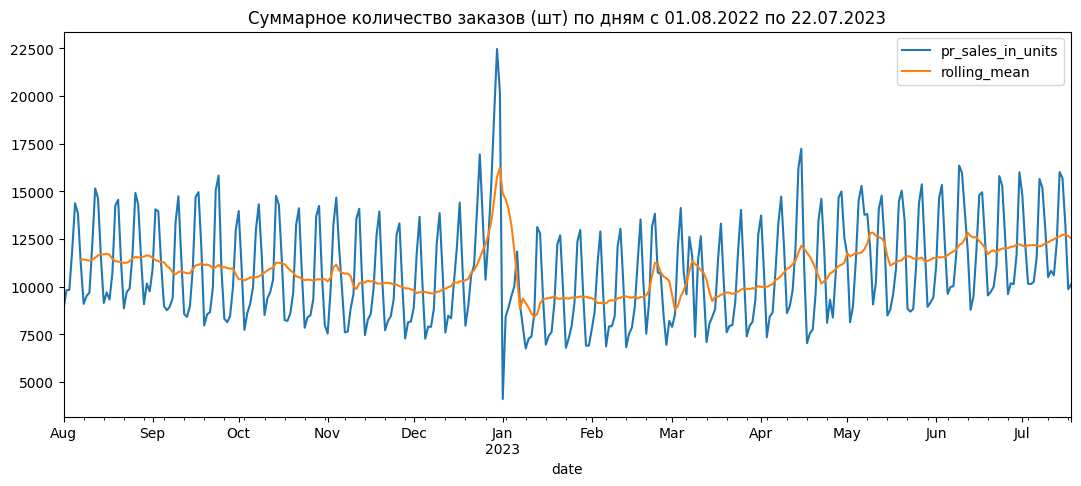

In [ ]:
df_agg_date_roll.plot(title='Суммарное количество заказов (шт) по дням с 01.08.2022 по 22.07.2023',
                      figsize=(13,5)
                      );

Явного тренда на увеличение продаж нет (возможно увеличение в летние месяцы?). Большие всплески на Новый год (и сразу спад после - люди доедают) и Пасху. Небольшие всплески на ноябрьские каникулы, 23 февраля, 8 марта, майские праздники.

Разложим временной ряд на три составляющие: тренд, сезонность и остаток. Посмотрим на образовавшиеся зависимости:

In [ ]:
df_agg_date[['pr_sales_in_units']].shape

(352, 1)

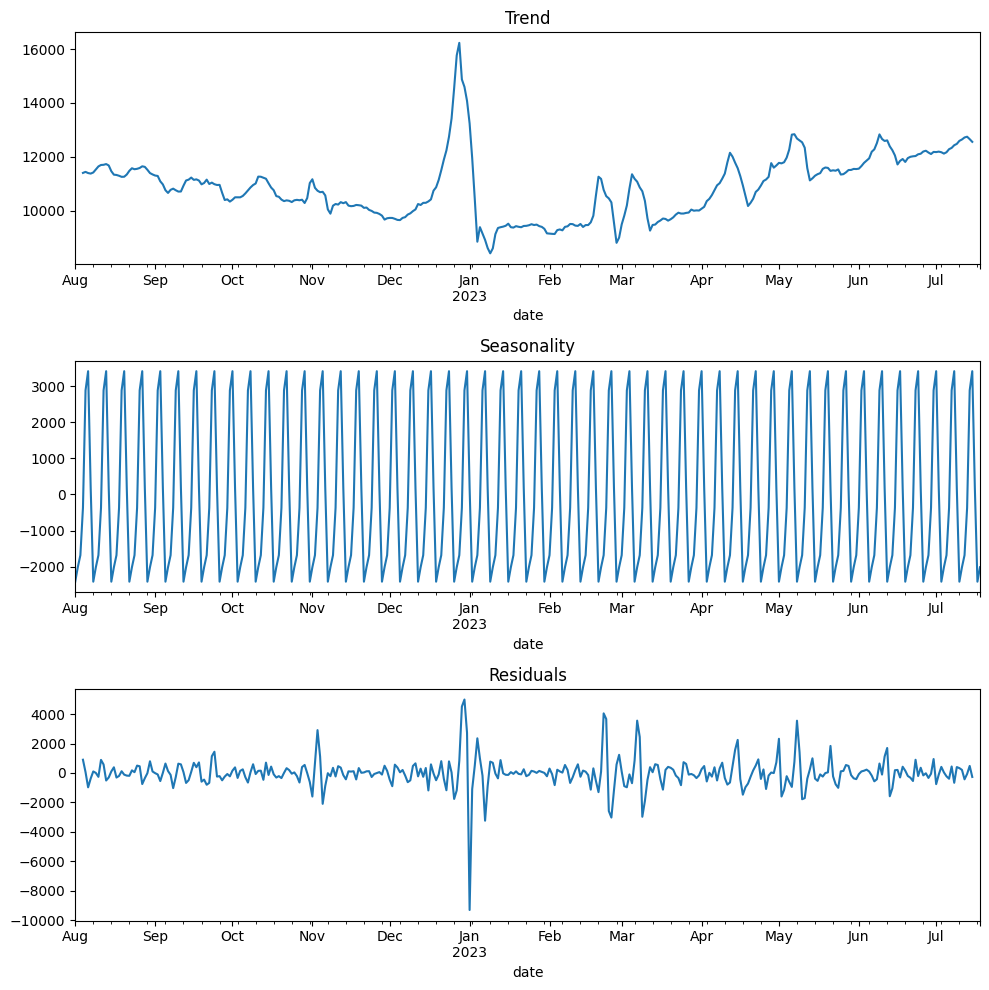

In [ ]:
decomposed = seasonal_decompose(df_agg_date[['pr_sales_in_units']])

plt.figure(figsize=(10, 10))
plt.subplot(311)

# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Виден тренд роста продаж в летние месяцы. Можно посмотреть, скорее всего это связано с продуктами на развес (сезон фруктов).

Изменим масштаб: проверим сезонность внутри одного месяца (выберем первую половину октября 2022, где нет праздников и дополнительных выходных):

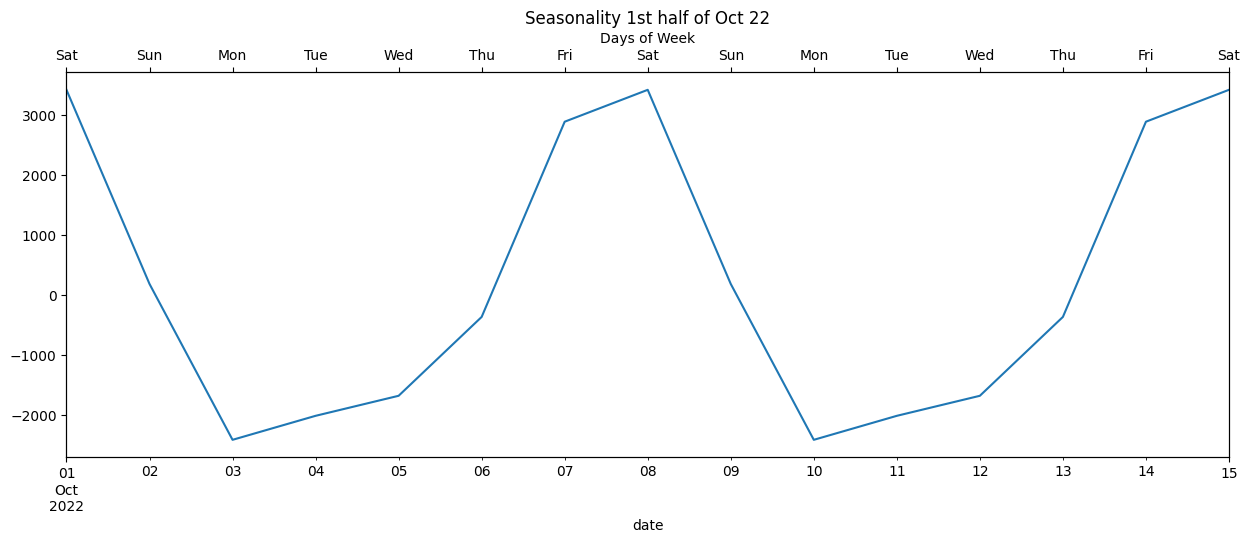

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
decomposed.seasonal['2022-10-01':'2022-10-15'].plot(ax=ax)
ax2 = ax.twiny()
ax2.set_xticks(np.arange(len(decomposed.seasonal['2022-10-01':'2022-10-15'])))
ax2.set_xticklabels(decomposed.seasonal['2022-10-01':'2022-10-15'].index.strftime('%a'))
ax2.set_xlabel('Days of Week')
plt.title('Seasonality 1st half of Oct 22');

Видим, что есть цикличные изменения по неделям. Больше всего продуктов покупают по субботам (на втором месте пятница - думаю, когда люди уезжают на выходные на дачу). Минимальные закупки по понедельникам.

### Исследование на нормальность

Еще раз проверяем распределение данных по всем датафреймам.



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



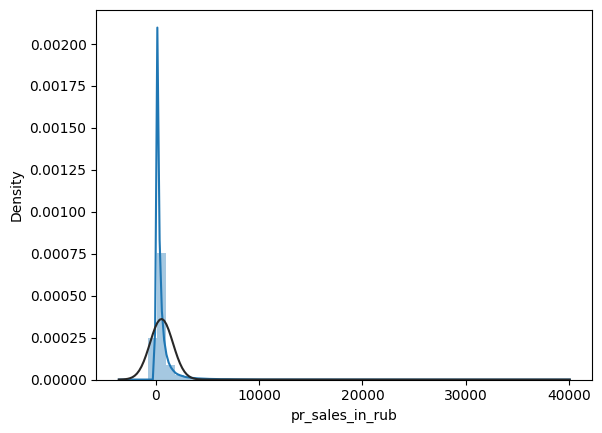

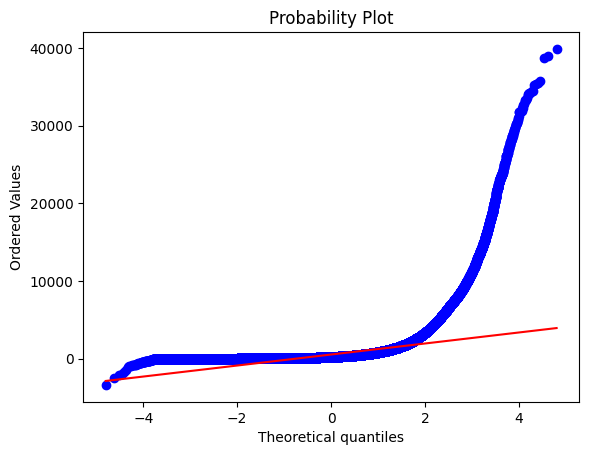

In [ ]:
distribution(df_full_sales['pr_sales_in_rub']);



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



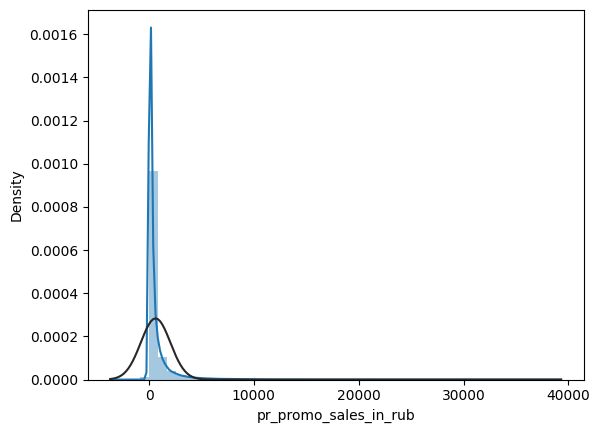

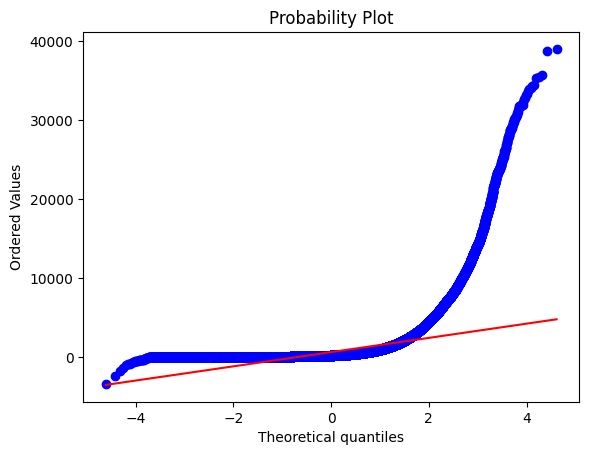

In [ ]:
distribution(df_full_sales['pr_promo_sales_in_rub'])



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



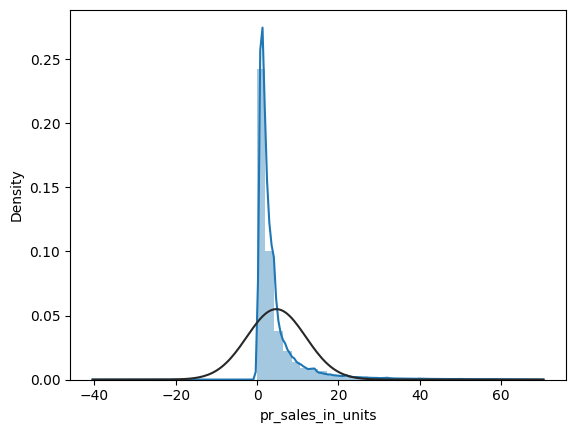

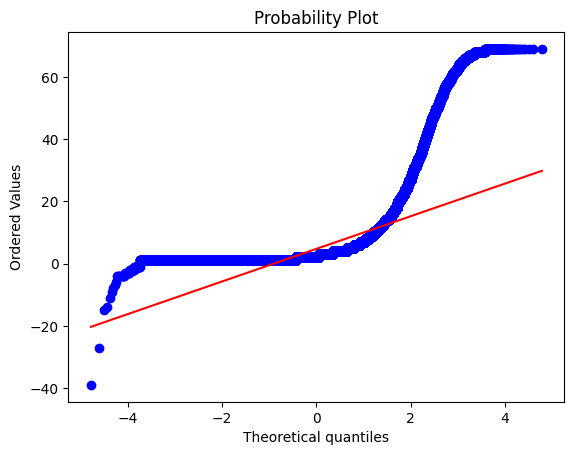

In [ ]:
distribution(df_full_sales['pr_sales_in_units'])

Здесь видим распределение Пуассона.



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



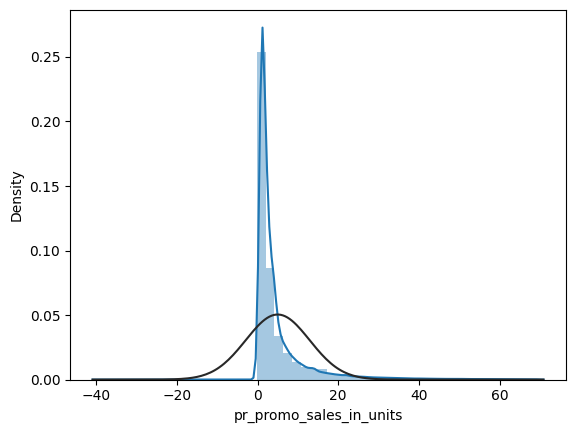

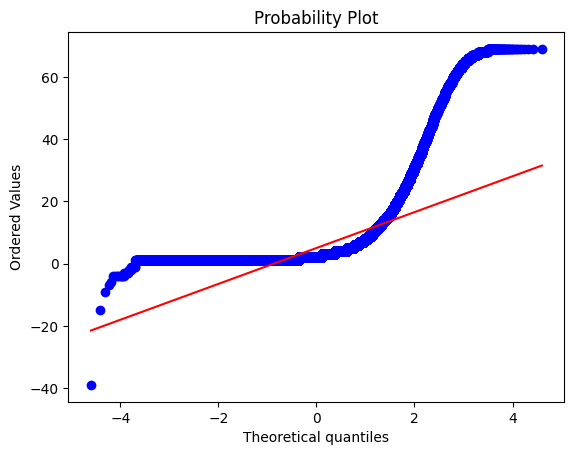

In [ ]:
distribution(df_full_sales['pr_promo_sales_in_units'])



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



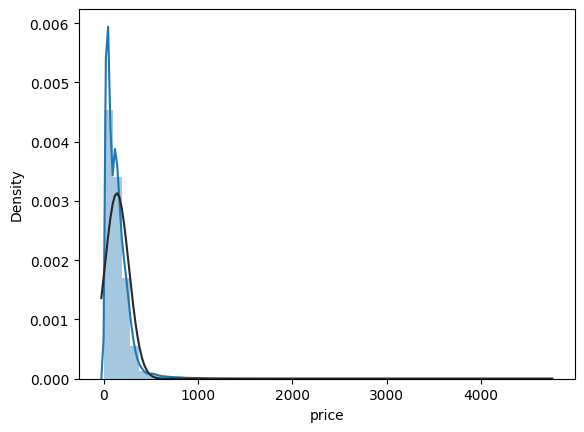

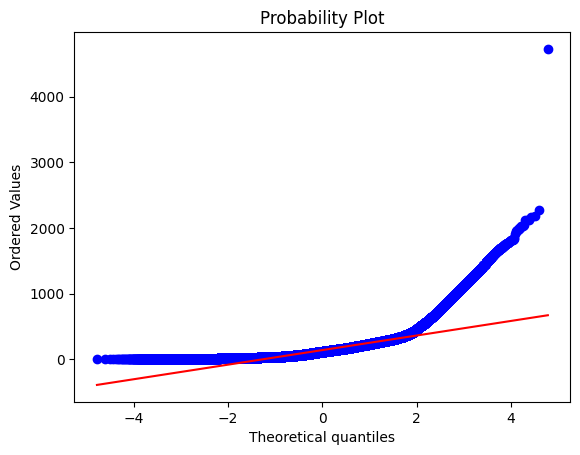

In [ ]:
distribution(df_full_sales['price'])



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



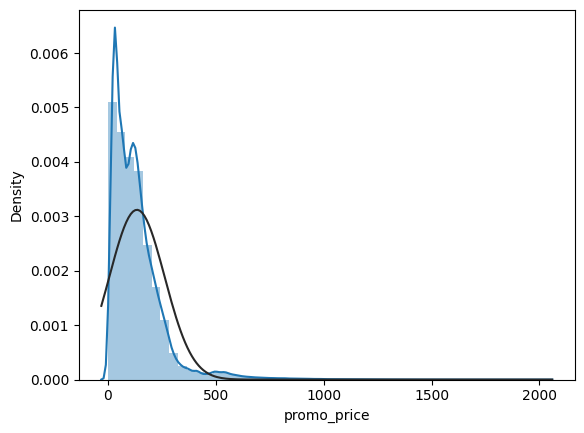

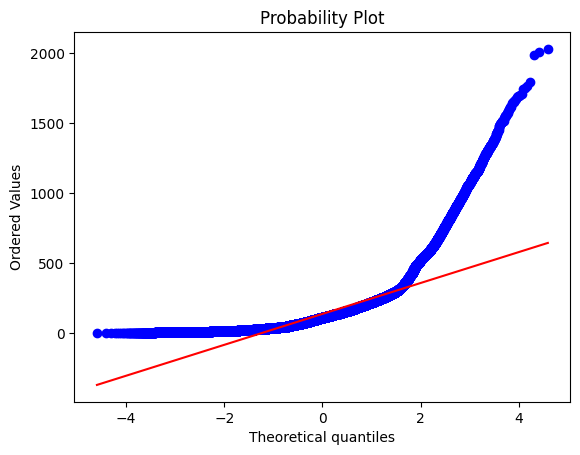

In [ ]:
distribution(df_full_sales['promo_price'])

Не логарифмируем данные, чтобы исправить распределения. Catboost сам поправляет данные + логарифмы плохо работали. Только удаляем выбросы (<70, 3 quant + 3 std) - внутри пайплайна.

### Корреляция значений

Проверим корреляцию не столбцов между собой, а значений. Для этого агрегируем данные.  
  
Проверим корреляцию средних продаж в штуках между группами товаров `pr_group_id`:

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['date'],
                     columns = ['pr_group_id'],
                     aggfunc = ['mean'])
corr = piv.corr()
corr.style.background_gradient(cmap='coolwarm')

Проверим корреляцию средних продаж в штуках между категориями товаров pr_cat_id:

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['date'],
                     columns = ['pr_cat_id'],
                     aggfunc = ['mean'])
corr = piv.corr()
corr
corr.style.background_gradient(cmap='coolwarm')

Проверим корреляцию средних продаж в штуках между подкатегориями товаров pr_subcat_id:

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['date'],
                     columns = ['pr_subcat_id'],
                     aggfunc = ['mean'])
corr = piv.corr()
corr
corr.style.background_gradient(cmap='coolwarm')

All-NaN slice encountered
All-NaN slice encountered


## Pipeline

Алгоритм пайплайна (для тестов):

- Препроцессинг
- FE
- Модель
- Результат

Перезапишем df_full_sales, т.к. ранее предобрабатывали этот датафрейм для построения графика временных рядов

In [9]:
df_sales_combine = pd.merge(df_sales, df_pr, on='pr_sku_id')
df_sales_combine.shape

(883015, 12)

In [10]:
df_full_sales = pd.merge(df_sales_combine, df_pr_st, on='st_id')
df_full_sales.head(3)

st_id                         pr_sku_id  \
0  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
2  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   

        date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0 2022-10-20                 1                5.0                      5.0   
1 2023-02-02                 1                1.0                      1.0   
2 2022-10-09                 1                1.0                      1.0   

   pr_sales_in_rub  pr_promo_sales_in_rub                       pr_group_id  \
0            825.0                  825.0  aab3238922bcc25a6f606eb525ffdc56   
1            107.0                  107.0  aab3238922bcc25a6f606eb525ffdc56   
2            167.0                  167.0  aab3238922bcc25a6f606eb525ffdc56   

                          pr_cat_id                      pr_subcat_id  \
0  28fc2782ea7ef51c1104ccf7b9bea13d  d29b5ce9c2883f0b7e90f79071a2ca82   
1  28fc2782ea7ef51c1104ccf7b9bea13d  d29b5ce9c2883f0b7e90f79071a2ca82   
2  28fc2782ea7ef51c1104ccf7b9bea13d  d29b5ce9c2883f0b7e90f79071a2ca82   

   pr_uom_id                        st_city_id  \
0          1  908c9a564a86426585b29f5335b619bc   
1          1  908c9a564a86426585b29f5335b619bc   
2          1  908c9a564a86426585b29f5335b619bc   

                   st_division_code  st_type_format_id  st_type_loc_id  \
0  429a86ff6336c144ddaf6144f52ab52c                  1               1   
1  429a86ff6336c144ddaf6144f52ab52c                  1               1   
2  429a86ff6336c144ddaf6144f52ab52c                  1               1   

   st_type_size_id  st_is_active  
0                8             1  
1                8             1  
2                8             1

In [ ]:
df_full_sales.dtypes

st_id                              object
pr_sku_id                          object
date                       datetime64[ns]
pr_sales_type_id                    int64
pr_sales_in_units                 float64
pr_promo_sales_in_units           float64
pr_sales_in_rub                   float64
pr_promo_sales_in_rub             float64
pr_group_id                        object
pr_cat_id                          object
pr_subcat_id                       object
pr_uom_id                           int64
st_city_id                         object
st_division_code                   object
st_type_format_id                   int64
st_type_loc_id                      int64
st_type_size_id                     int64
st_is_active                        int64
dtype: object

Создадим классы для использования в пайплайне:

| Класс           | Метод      | Описание метода                                                     |
|-----------------|------------|--------------------------------------------------------------------|
| preprocessing  | transform  | 1) Фильтруем значения столбцов, чтобы не было отрицательных значений продаж |
|                 |            | 2) Оставляем только активные магазины                                 |
|                 |            | 3) Избавляемся от id магазинов, где нулевые продажи в штуках, но не нулевые в рублях |
|                 |            | 4) Сортируем датафрейм по date, чтобы временной ряд монотонно возрастал |
|                 |            | 5) Считаем цену price за 1 шт товара                                 |
|                 |            | 6) Считаем цену promo_price за 1 шт промо-товара                     |
|                 |            | 7) Избавляемся от выбросов: оставляем только продажи меньше 60 шт    |
|                 |            | 8) Возвращаем датафрейм                                                  |


In [11]:
class preprocessing(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.loc[
            (X['pr_sales_in_rub'] >= 0) & (X['pr_promo_sales_in_rub'] >= 0)]
        X = X.loc[
            (X['pr_sales_in_units'] >= 0) & (X['pr_promo_sales_in_units'] >= 0)]
        X = X.loc[X['st_is_active'] == 1]
        X = X.loc[
        (X['st_id'] != 'bd470ca955d9497bbcb808e59952fffc') &
        (X['st_id'] != '084a8a9aa8cced9175bd07bc44998e75')]

        X = X.sort_values(by='date', ignore_index = True)

        X['price'] = np.where(
            X['pr_sales_in_units'] > 0,
            X['pr_sales_in_rub'] / X['pr_sales_in_units'],
            0)

        X = X.loc[X['pr_sales_in_units'] < 60] # удаляем выбросы


        return X

class feature_engineering(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def features_generation(self, X, max_lag, *rolling):
        """
        Метод features_generation выполняет генерацию дополнительных признаков
        на основе данных входного датасета X. Он принимает следующие параметры:

        - X: Датасет с информацией о продажах (в виде DataFrame).
        - max_lag: Максимальное количество отставаний для создания признаков с
        лагами.
        - *rolling: Переменное количество значений, представляющих размеры окон
        для расчета скользящего среднего.

        Внутри метода происходит следующий алгоритм:
        1. Создается пустой DataFrame self.df, который будет содержать
        сгенерированные признаки.
        2. По каждому уникальному значению столбца 'st_id' в датасете X
        выполняются следующие шаги:
          a. Создается срез (self.slices) датасета X, содержащий только записи
          с заданным значением 'st_id'.
          b. Из среза self.slices выбираются только столбцы 'st_id', 'date' и
          'pr_sales_in_units'.
          c. Выполняется группировка среза self.slices по столбцам 'st_id' и
          'date', и для столбца 'pr_sales_in_units' суммируются значения.
          d. Для каждого значения roll в аргументе *rolling вычисляется
          скользящее среднее значения 'pr_sales_in_units' с помощью
          shift().rolling().
          e. Для столбца 'pr_sales_in_units' выполняется ряд статистических
          вычислений (минимум, максимум, медиана, дисперсия) с использованием
          shift().rolling().
          f. Для каждого значения lag от 1 до max_lag выполняется отстаивание
          столбца 'pr_sales_in_units' с использованием shift().
          g. Срез self.slices сбрасывается в исходные индексы.
          h. Срез self.slices добавляется к DataFrame self.df.
          i. Столбец 'pr_sales_in_units' удаляется из DataFrame self.df.
        3. Датасет X объединяется с DataFrame self.df по столбцам 'st_id' и
        'date'.

        Метод возвращает обновленный датасет X с сгенерированными признаками.
        """
        self.df = pd.DataFrame(columns=['st_id', 'date', 'pr_sales_in_units'])

        for i in X['st_id'].unique():
            self.slices = X.loc[X['st_id'] == i]
            self.slices = self.slices[['st_id', 'date', 'pr_sales_in_units']]
            self.slices = self.slices.groupby(['st_id', 'date']).sum()
            for roll in rolling:
                self.slices['rol' + str(roll)] = self.slices['pr_sales_in_units'].shift().rolling(roll).mean()

            # Добавляем статистические признаки для столбца pr_sales_in_units в окне
            self.slices['pr_sales_min'] = self.slices['pr_sales_in_units'].shift(periods=7).rolling(window=14).min()
            self.slices['pr_sales_max'] = self.slices['pr_sales_in_units'].shift(periods=7).rolling(window=14).max()
            self.slices['pr_sales_median'] = self.slices['pr_sales_in_units'].shift(periods=7).rolling(window=14).median()
            self.slices['pr_sales_variance'] = self.slices['pr_sales_in_units'].shift(periods=7).rolling(window=14).var()

            for lag in range(1, max_lag + 1):
                self.slices['lag_{}'.format(lag)] = self.slices['pr_sales_in_units'].shift(lag)
            self.slices = self.slices.reset_index()
            self.df = pd.concat([self.df, self.slices])
            self.df = self.df.drop(['pr_sales_in_units'], axis=1)
        X = pd.merge(X, self.df, on=['st_id', 'date'])
        return X


    def transform(self, X):
        """
        Метод transform выполняет преобразование входного датасета X,
        добавляя в него дополнительные признаки и прогнозируя продажи с помощью
        модели Prophet.

        Описание шагов, выполняемых в методе:
        1. Применяется метод features_generation с параметрами max_lag=14 и
        значениями для *rolling равными 7 и 14. Этот метод выполняет генерацию
        дополнительных признаков, основанных на отставаниях и скользящих средних.
        2. Добавляется новый признак dayofweek, содержащий информацию о дне
        недели на основе столбца с датами продаж.
        3. Удаляются строки с пропущенными значениями.
        4. Выполняется группировка датасета по столбцам 'date' и 'pr_sku_id' и
        вычисляется суммарное значение продаж в единицах для каждой комбинации
        даты и товара. Полученные данные представляются в виде сводной таблицы.
        5. Выполняется заполнение пропущенных значений в сводной таблице нулями
        и ее транспонирование.
        6. Применяется стандартизация данных в сводной таблице с помощью
        StandardScaler.
        7. Создается экземпляр модели TimeSeriesKMeans с параметрами
        n_clusters=34, metric="euclidean", n_jobs=-1, max_iter=15 и
        random_state=42. Модель обучается на стандартизированных данных.
        8. Получается прогнозируемая метка кластера для каждого товара на
        основе модели TimeSeriesKMeans.
        9. Производится слияние исходного датасета с таблицей меток кластеров
        для каждого товара.
        10. Выполняются аналогичные шаги 4-9 для вычисления медианной цены
        товара и присвоения меток кластеров, основанных на цене.
        11. Создается новый DataFrame prof на основе столбцов 'date' и
        'pr_sales_in_units', где значения 'date' используются как индексы.
        12. Пивотируется таблица prof, суммируя значения продаж по датам.
        13. Добавляется столбец 'ds' со значениями дат из индекса таблицы.
        14. Создается экземпляр модели Prophet.
        15. Модель Prophet обучается на данных продаж с использованием метода fit.
        16. Выполняется прогнозирование продаж с помощью обученной модели Prophet.
        17. Создается DataFrame future с помощью метода make_future_dataframe,
        который создает последовательность дат на основе исходной таблицы,
        а также добавляет периоды и частоту прогнозирования.
        18. Выполняется прогноз с помощью метода predict, передавая ему
        DataFrame future и сохраняя результаты прогнозирования в переменной forecast.
        19. Создается столбец 'date' в DataFrame forecast, содержащий значения
        дат из столбца 'ds' прогноза.
        20. Из DataFrame forecast выбираются нужные столбцы 'trend', 'date',
        'trend_upper', 'trend_lower', 'yhat' и сохраняются в переменной forecast.
        21. Выполняется объединение (merge) исходного датасета X с DataFrame
        forecast, основанное на столбце 'date'. Это позволяет добавить прогнозные
        данные в исходный датасет.
        22. Создается список list_col, содержащий имена столбцов 'date' и
        'holiday'.
        23. Датасет X объединяется с DataFrame holidays_df, основываясь на
        столбце 'date' и выбирая только столбцы из списка list_col. Таким
        образом, добавляются информация о праздниках в датасет X.
        24. Столбец 'st_is_active' удаляется из датасета X с помощью метода drop.

        Возвращается измененный датасет X.
        """
        X = self.features_generation(X, 14, 7, 14)
        X['dayofweek'] = X['date'].dt.dayofweek

        X = X.dropna()

        self.product_df = X.groupby(['date', 'pr_sku_id'])['pr_sales_in_units'].sum().unstack()
        self.product_df = self.product_df.fillna(0).T
        self.scaler = StandardScaler()
        self.product_scaled = self.scaler.fit_transform(self.product_df)
        self.kmeanModel = TimeSeriesKMeans(n_clusters=34, metric="euclidean", n_jobs=-1, max_iter=15,random_state=42)
        self.kmeanModel.fit(self.product_scaled)
        self.labels = self.kmeanModel.labels_
        self.products_labels = pd.DataFrame({"product_clasters": self.labels, "pr_sku_id": self.product_df.index})
        X = pd.merge(X, self.products_labels, on="pr_sku_id")

        self.product_df = X.groupby(['date', 'pr_sku_id'])['price'].sum().unstack()
        self.product_df = self.product_df.fillna(0).T
        self.scaler = StandardScaler()
        self.product_scaled = self.scaler.fit_transform(self.product_df)
        self.kmeanModel = TimeSeriesKMeans(n_clusters=15, metric="euclidean", n_jobs=-1, max_iter=15,random_state=42)
        self.kmeanModel.fit(self.product_scaled)
        self.labels = self.kmeanModel.labels_
        self.products_labels = pd.DataFrame({"price_clasters": self.labels, "pr_sku_id": self.product_df.index})
        X = pd.merge(X, self.products_labels, on="pr_sku_id")

        self.ds = X['date']
        self.y = X['pr_sales_in_units']
        self.prof = pd.concat([self.ds, self.y], axis = 1)
        self.prof.columns = ['x', 'y']
        self.prof = self.prof.pivot_table(index = 'x', values = 'y', aggfunc = 'sum')
        self.prof['ds'] = self.prof.index
        self.model = Prophet()
        #Обучите модель на данных продаж
        self.model.fit(self.prof)
        #Сделайте прогноз
        self.future = self.model.make_future_dataframe(periods=14, freq='D')
        self.forecast = self.model.predict(self.future)
        self.forecast['date'] = self.forecast['ds']
        self.forecast = self.forecast[['trend', 'date', 'trend_upper', 'trend_lower', 'yhat']]
        X = pd.merge(X, self.forecast, on = 'date')

        list_col = [ 'date',  'holiday']
        X = X.merge(holidays_df[list_col], on="date",how='inner')
        X = X.drop('st_is_active', axis = 1)

        return X

class split(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """
        Метод transform класса split.

        - Разбиваем датафрейм на обучающую и тестовую выборки
        """
        self.features = X.drop(
            ['pr_sales_in_units', 'pr_promo_sales_in_units',
             'pr_sales_in_rub', 'pr_promo_sales_in_rub'], axis = 1) # убрала price
        self.target = X['pr_sales_in_units']
        self.features_train, self.features_test, self.target_train, self.target_test = train_test_split(
            self.features, self.target, test_size = 0.1, shuffle = False
        )
        return self.features_train, self.features_test, self.target_train, self.target_test

In [ ]:
df_full_sales.to_csv('df.csv')

Категориальные признаки:

In [12]:
catigorical = ['st_id', 'pr_sku_id', 'pr_group_id', 'pr_cat_id',
               'pr_sales_type_id', 'pr_subcat_id', 'pr_uom_id',
               'st_city_id', 'st_division_code', 'st_type_format_id',
               'st_type_loc_id', 'st_type_size_id', 'dayofweek', 'product_clasters',
               'holiday', 'price_clasters']

Создаем пайплайн:

In [13]:
pipe_1 = Pipeline([
    ('preprocessing', preprocessing()),
    ('features_engineering', feature_engineering())

])

df_full_sales = pipe_1.fit_transform(df_full_sales)

features = df_full_sales.drop(['pr_sales_in_units',
                               'pr_promo_sales_in_units',
                               'pr_sales_in_rub',
                               'pr_promo_sales_in_rub'],
                              axis = 1)
target = df_full_sales['pr_sales_in_units']

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxi_bafa1/cv_u8dux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxi_bafa1/dx4t0gzi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51795', 'data', 'file=/tmp/tmpxi_bafa1/cv_u8dux.json', 'init=/tmp/tmpxi_bafa1/dx4t0gzi.json', 'output', 'file=/tmp/tmpxi_bafa1/prophet_model_9fddwij/prophet_model-20231009171955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:19:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
features.columns

Index(['st_id', 'pr_sku_id', 'date', 'pr_sales_type_id', 'pr_group_id',
       'pr_cat_id', 'pr_subcat_id', 'pr_uom_id', 'st_city_id',
       'st_division_code', 'st_type_format_id', 'st_type_loc_id',
       'st_type_size_id', 'price', 'rol7', 'rol14', 'pr_sales_min',
       'pr_sales_max', 'pr_sales_median', 'pr_sales_variance', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9',
       'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'dayofweek',
       'product_clasters', 'price_clasters', 'trend', 'trend_upper',
       'trend_lower', 'yhat', 'holiday'],
      dtype='object')

In [ ]:
features_price = df_full_sales[['st_id', 'pr_sku_id', 'date', 'pr_group_id',
                                'pr_cat_id', 'pr_sales_type_id', 'pr_subcat_id',
                                'pr_uom_id', 'st_city_id', 'st_division_code',
                                'st_type_format_id', 'st_type_loc_id',
                                'st_type_size_id', 'product_clasters', 'holiday',
                                'price_clasters']]

target_price = df_full_sales[['price']]

In [ ]:
model_price = joblib.load('/content/drive/MyDrive/sp_sales_task/model_price_2.pkl')

In [ ]:
model_price

In [ ]:
model_price.

Итоговый набор признаков:

Предсказываем цену на тесте:

In [ ]:
price_preds = model_price.predict(features_price)

In [ ]:
# Создаем DataFrame из предсказаний
pred_df = pd.DataFrame(price_preds, columns=['price_predictions'])

# Сохраняем DataFrame в CSV-файл
pred_df.to_csv('/content/drive/MyDrive/sp_sales_task/predictions.csv', index=False)

In [ ]:
pred_df.shape[0]

825173

In [ ]:
target_price.shape[0]

825173

In [ ]:
features_test.shape[0] + target_test.shape[0], features_train.shape[0] + target_train.shape[0]

(165036, 1481486)

Сохраним предсказания:

In [ ]:
joblib.dump(price_preds, '/content/drive/MyDrive/sp_sales_task/price_preds.pkl')

['/content/drive/MyDrive/sp_sales_task/price_preds.pkl']

#Кросс-валидация

In [14]:
model_cb_2 = joblib.load('/content/drive/MyDrive/sp_sales_task/model_cb-2.pkl')

In [ ]:
def cross_validation_wape(features, target, model, days=14, n_folds = 5):
    """
    Функция для кросс-валидации датафрейма временного ряда для метрики wape.

    Args:
        target: реальное значение временного ряда
        features: признаки временного ряда.
        model: Модель для прогнозирования.
        days: Количество дней в каждом шаге прогноза.
        n_folds: Количесвто шагов для прогноза

    Returns:
        np.array значений метрики wape для каждого фолда.
    """

    # Разбиваем датафрейм на фолды


    fold_boundaries = [
            pd.to_datetime(
                features['date'].max() - i * timedelta(days=days))
            for i in range(1, n_folds + 1)
        ]

    # Делаем прогнозы для каждого фолда

    wape_scores = []
    for time in fold_boundaries[::-1]:
        X_test = features[(features['date']>time) &
                     (features['date']<= time + timedelta(days=days))
                     ]
        X_train  = features[features['date'] > time]
        y_train  = target[X_train.index]

        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        true_y = target[X_test.index]

        # Оцениваем качество прогноза
        wape_scores.append(wape(true_y, predictions))

    return np.array(wape_scores), model

## CatBoost + CV + тюнинг гиперпараметров

Используем RandomizedSearchCV для тюнинга гиперпараметров. Используем CatBoostRegressor в качестве модели. Для возможного улучшения метрики на скрытых тестовых данных мы для кросс-валидации возьмем обучающую и тестовую выборки. После выбора лучших гиперпараметров переобучим Catboost на объединенной выборке (train+test) и уже его будем использовать на финальном датасете заказчика. В таком подходе есть риск переобучения, т.к. мы отказываемся от кросс-валидации в чистом виде, но при этом появляется возможность улучшить итоговый WAPE.

In [ ]:
param_grid = {'iterations': [500, 1000],
              'depth': [3, 7, 10]
             }

In [ ]:
model_cv = CatBoostRegressor(random_state=42, cat_features = categorical)

In [ ]:
%%time

clf = RandomizedSearchCV(model_cv,
                         param_grid,
                         random_state=42,
                         verbose=3,
                         cv=time_split,
                         scoring=wape_scorer
                        )

clf = clf.fit(features_train, target_train)
predictions_cb_test = clf.predict(features_test)

wape_cb_cv = wape(target_test, predictions_cb_test)

cb_cv_results = pd.DataFrame(clf.cv_results_)

print('Tuned Hyperparameters:', clf.best_params_)
print('CatBoostRegressor WAPE на известной тестовой выборке:', wape_cb_cv)
print()

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.


Выходные данные были обрезаны до нескольких последних строк (5000).
512:	learn: 3.8166292	total: 10m 55s	remaining: 10m 21s
513:	learn: 3.8161868	total: 10m 57s	remaining: 10m 21s
514:	learn: 3.8157608	total: 10m 58s	remaining: 10m 20s
515:	learn: 3.8148533	total: 10m 59s	remaining: 10m 18s
516:	learn: 3.8143059	total: 11m	remaining: 10m 17s
517:	learn: 3.8138610	total: 11m 1s	remaining: 10m 15s
518:	learn: 3.8132753	total: 11m 2s	remaining: 10m 14s
519:	learn: 3.8130503	total: 11m 3s	remaining: 10m 12s
520:	learn: 3.8122167	total: 11m 4s	remaining: 10m 11s
521:	learn: 3.8119164	total: 11m 5s	remaining: 10m 9s
522:	learn: 3.8115029	total: 11m 6s	remaining: 10m 8s
523:	learn: 3.8112767	total: 11m 7s	remaining: 10m 6s
524:	learn: 3.8109192	total: 11m 9s	remaining: 10m 5s
525:	learn: 3.8103739	total: 11m 11s	remaining: 10m 4s
526:	learn: 3.8101629	total: 11m 13s	remaining: 10m 4s
527:	learn: 3.8094759	total: 11m 14s	remaining: 10m 3s
528:	learn: 3.8065038	total: 11m 15s	remaining: 10m 1s


Результаты на более ранних тестированиях:

|                     |                                               |
|---------------------|-----------------------------------------------|
| param_grid          | {'iterations': [100, 200],                    |
|                     | 'learning_rate': [0.03, 0.1],                 |
|                     | 'depth': [4, 6],                              |
|                     | 'l2_leaf_reg': [1, 3]                         |
| model_cv            | param_grid,random_state=42,verbose=3,cv=time_split,scoring=wape_scorer |
| **Результат**       |                                               |
| Tuned Hyperparameters: | {'learning_rate': 0.1,                        |
|                     | 'l2_leaf_reg': 1,                             |
|                     | 'iterations': 200,                            |
|                     | 'depth': 6}                                   |
| CatBoostRegressor WAPE на кросс-валидации | 0.34245304052315767 |
| CPU times           | user 1h 59min 41s,                            |
|                     | sys: 40.9 s,                                  |
|                     | total: 2h 22s                                 |
| Wall time           | 1h 17min 55s                                  |
              

In [ ]:
model_cb = CatBoostRegressor(iterations = 1500, depth = 12, cat_features = catigorical, verbose = 100)
model_cb.fit(features, target)
# preds = model_cb.predict(features_test)

Learning rate set to 0.085081
0:	learn: 6.3222774	total: 8.55s	remaining: 3h 33m 32s
100:	learn: 4.1227319	total: 14m 5s	remaining: 3h 15m 15s
200:	learn: 3.8389602	total: 28m 11s	remaining: 3h 2m 9s
300:	learn: 3.6520238	total: 41m 49s	remaining: 2h 46m 37s
400:	learn: 3.5045934	total: 55m 37s	remaining: 2h 32m 27s
500:	learn: 3.3982972	total: 1h 9m 4s	remaining: 2h 17m 44s
600:	learn: 3.2954135	total: 1h 22m 21s	remaining: 2h 3m 11s
700:	learn: 3.2091696	total: 1h 35m 54s	remaining: 1h 49m 19s
800:	learn: 3.1287489	total: 1h 49m 11s	remaining: 1h 35m 17s
900:	learn: 3.0524905	total: 2h 2m 48s	remaining: 1h 21m 38s
1000:	learn: 2.9916811	total: 2h 16m 14s	remaining: 1h 7m 55s
1100:	learn: 2.9333920	total: 2h 29m 30s	remaining: 54m 11s
1200:	learn: 2.8740525	total: 2h 42m 45s	remaining: 40m 31s
1300:	learn: 2.8232063	total: 2h 56m	remaining: 26m 55s
1400:	learn: 2.7671954	total: 3h 9m 23s	remaining: 13m 23s
1499:	learn: 2.7209816	total: 3h 22m 26s	remaining: 0us


In [ ]:
joblib.dump(model_cb, '/content/drive/MyDrive/sp_sales_task/model_cb.pkl')

['/content/drive/MyDrive/sp_sales_task/model_cb.pkl']

## SHAP

Вычислим значения важности признаков для целевой переменной с помощью библиотеки SHAP.

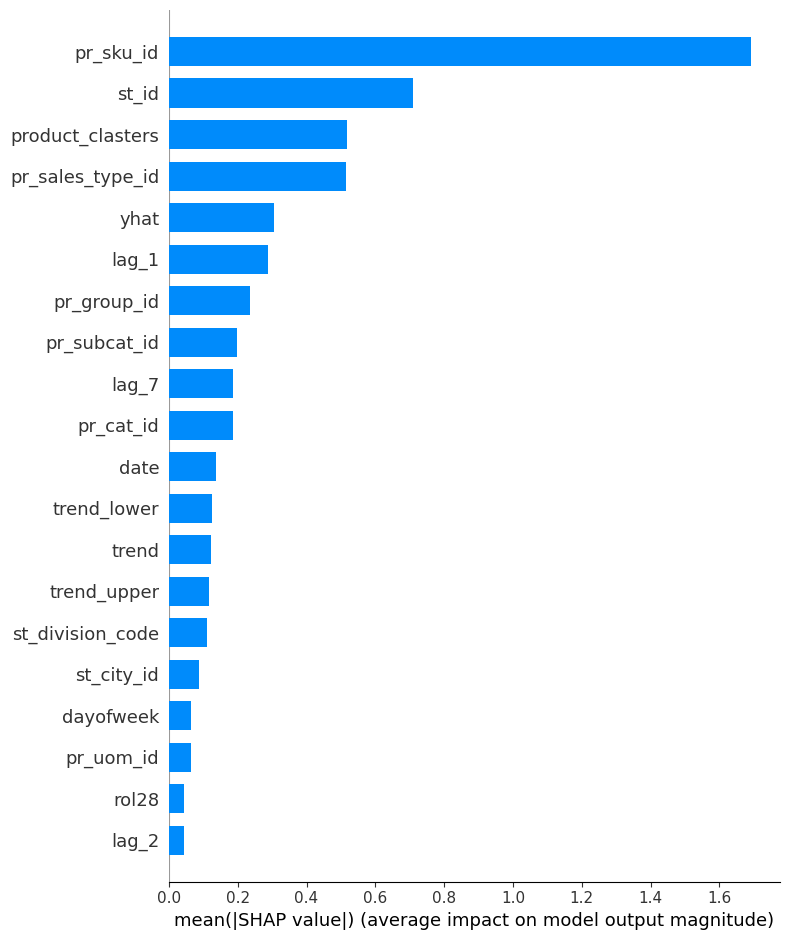

In [ ]:
explainer = shap.Explainer(model_cb)
shap_values = explainer(features_test)
shap.summary_plot(shap_values, features_test, plot_type='bar')

## Регрессия Lasso

In [ ]:
def get_linear_data(X):
  #делим выборку
  split_date = X['date'].max() - datetime.timedelta(days=14)
  train_idx = gipper_df["date"] < split_date
  test_idx = gipper_df["date"] >= split_date

  X_train = X[train_idx]
  X_test = X[test_idx]

  y_tain = X_train['pr_sales_in_units'].to_numpy()
  y_test = X_test['pr_sales_in_units'].to_numpy()

  # катигориальные
  cat= ['st_id','pr_sku_id','pr_group_id','pr_cat_id','pr_sales_type_id','pr_subcat_id','pr_uom_id','st_city_id',
      'st_division_code','st_type_format_id','st_type_loc_id','st_type_size_id','dayofweek','product_clasters']

  cat_train = X_train[cat]
  cat_train  = pd.get_dummies(cat_train, drop_first=True)

  cat_test = X_test[cat]
  cat_test  = pd.get_dummies(cat_test, drop_first=True)

  # стандартизация
  scaler = StandardScaler()
  numeric  = ['rol14', 'rol28', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9',
       'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14','trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat']

  scaler.fit(X_train[numeric])
  train_numeric = scaler.transform(X_train[numeric])
  test_numeric = scaler.transform(X_test[numeric])

  train_numeric = pd.DataFrame(train_numeric,columns = numeric)
  test_numeric = pd.DataFrame(test_numetric,columns = numeric)

  X_train = pd.concat([train_numeric, cat_train.reset_index()], axis=1)
  X_test = pd.concat([test_numetric, cat_test.reset_index()], axis=1)

  return X_train, X_test, y_tain, y_test

In [ ]:
model = Lasso(random_state=42,alpha=0.1)
model.fit(X_train,y_tain)
prediction = model.predict(X_test)


wape(y_test,prediction)

Пробовали разные способы, от разных признаков, до кластеров товаров, wape ниже  0.75 не удалось опустить. Лучше всего показывала lasso, скорее всего из-за зануления не нужных признаков при регуляции

## Opunta

In [22]:
parametrs_best_model = model.get_all_params()

In [17]:
X = features
X['y'] = target

X.columns

Index(['st_id', 'pr_sku_id', 'date', 'pr_sales_type_id', 'pr_group_id',
       'pr_cat_id', 'pr_subcat_id', 'pr_uom_id', 'st_city_id',
       'st_division_code', 'st_type_format_id', 'st_type_loc_id',
       'st_type_size_id', 'price', 'rol7', 'rol14', 'pr_sales_min',
       'pr_sales_max', 'pr_sales_median', 'pr_sales_variance', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9',
       'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'dayofweek',
       'product_clasters', 'price_clasters', 'trend', 'trend_upper',
       'trend_lower', 'yhat', 'holiday', 'y'],
      dtype='object')

In [20]:
time  = X['date'].max() - timedelta(days=14)
X_test = X[X['date'] > time ]
X = X[X['date'] <= time ]

In [23]:
# Определите функцию для вычисления WAPE
def wape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)

def objective(trial,best_params):
   # Определение параметров для оптимизации
    params = {
        "iterations": trial.suggest_int("iterations", 500, 1500),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1),
        "depth": trial.suggest_int("depth", 5, 15),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 100),
    }
    model = CatBoostRegressor(**params, cat_features = catigorical, silent=True,
                              early_stopping_rounds=20,
                              loss_function='RMSE',
                              #loss_function ='Poisson',
                              #has_time=True
                              )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    wape_varible = wape(y_test, y_pred)

    return wape_varible

# Разделим данные на обучающую и тестовую выборки
tscv = TimeSeriesSplit(n_splits=5)


# Инициализируем лучшие параметры некоторыми начальными значениями
best_params = parametrs_best_model
score_list = []
params_list = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    X_train = X_train.drop(columns = 'y')
    X_test = X_test.drop(columns = 'y')
    y_train, y_test = X['y'].iloc[train_index], X['y'].iloc[test_index]

    # Оптимизируем гиперпараметры с помощью Optuna
    study = optuna.create_study(direction="minimize",
                            pruner=optuna.pruners.HyperbandPruner(
        min_resource=1, max_resource=30, reduction_factor=3
    ))
    study.optimize(lambda trial: objective(trial, best_params), n_trials=5)
     # Обновим лучшие параметры
    best_params = study.best_params
    score_list.append(study.best_value)
    params_list.append(study.best_params)

[I 2023-10-09 17:33:29,413] A new study created in memory with name: no-name-e8c867f2-6e98-4af6-9ed9-15cb73fb0023
[I 2023-10-09 17:37:07,207] Trial 0 finished with value: 0.5508356544597408 and parameters: {'iterations': 713, 'learning_rate': 0.04782426544768355, 'depth': 9, 'subsample': 0.27776436834474666, 'colsample_bylevel': 0.8127475144778818, 'min_data_in_leaf': 72}. Best is trial 0 with value: 0.5508356544597408.
[I 2023-10-09 17:53:36,849] Trial 1 finished with value: 0.535988930164638 and parameters: {'iterations': 1011, 'learning_rate': 0.09685179473845612, 'depth': 14, 'subsample': 0.7576457739445743, 'colsample_bylevel': 0.30453657783061255, 'min_data_in_leaf': 10}. Best is trial 1 with value: 0.535988930164638.
[I 2023-10-09 18:05:26,879] Trial 2 finished with value: 0.5341284254650954 and parameters: {'iterations': 902, 'learning_rate': 0.07114640827084244, 'depth': 13, 'subsample': 0.5481598297639628, 'colsample_bylevel': 0.4914200317489788, 'min_data_in_leaf': 42}. Best

KeyboardInterrupt: ignored

# Вывод

## Анализ данных для прогнозирования продаж

**EDA**

* Изучили распределение данных. Встречаются выбросы, порой очень сильно отличающиеся от нормального.
* Пропусков нет.
* Использован коэффициент фи, чтобы найти группы сходных признаков.
* Товары можно разделить на 34 категории по временным рядам.
* Удалены 2 закрытых магазина.
* Изучен график временного ряда целевого признака. В нём присутствует тренд снижения общего количества товаров от лета к зиме, а также пик в декабре с резким падением в январе, новогодние праздники. Небольшие всплески наблюдаются на ноябрьские каникулы, 23 февраля, 8 марта и майские праздники.

**Features engineering**

* Удалены отрицательные значения продаж.
* Оставлены только активные магазины.
* Удалены id магазинов, где нулевые продажи в штуках, но не нулевые в рублях.
* Посчитана цена за 1 шт товара.
* Посчитана цена за 1 шт промо-товара.
* Удалены выбросы: оставляем только продажи меньше 60 штук.
* Использованы **lag(7)** и **lag(14)**.
* Использован **Prophet** для генерации признаков.
* Более подробно в описании Pipeline

**Обучение моделей**

* Использован **Prophet** для наивного прогноза.слишком долго строить предсказания, если идти по каждому магазину и товару, при кластерах большая ошибка. Просто включили в pipeline, для “большой модели”
* Линейные регрессии показали аналогичные результаты.
* **LightGBM** показал себя хуже, чем **CatBoost**. Отказались
* **CatBoost** на кроссвалидации показал **wape** = 0,34.

**Точки роста**

* Использовать разные модели по разным размерам магазина и разным кластерам товаров.
* Использовать **optuna** для подбора гиперпараметров.
* Поработать с признаками **Prophet**.

**Важность признаков согласно Shap для модели **CatBoost**

1. id товара
2. id магазина
3. Кластер продукта
4. Наличие промо
5. Предсказание **Prophet**